# Predictive Analysis for Enhanced Ad Placement Strategies at Ad Ease

## Problem Statement
The primary problem is to forecast daily views for 145,000 Wikipedia pages over a future period, enabling optimal ad placements to maximize click-through rates (CTR) and minimize costs for clients. This involves predicting page views across different languages and regions, evaluating the impact of campaigns using exogenous variables, and continuously improving forecast accuracy through various models like ARIMA, SARIMAX, and Prophet. The insights gained will help in tailoring marketing strategies, planning content, and efficiently allocating resources to ensure maximum engagement and performance.

In [469]:
#Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
from prophet import Prophet

## Basic understanding and Observation of the data

In [227]:
#Load the datasets
df = pd.read_csv(r"D:\DSML_class\Real world data assignments\Python\AdEase Time series\data\train_1.csv")
dfexog = pd.read_csv(r"D:\DSML_class\Real world data assignments\Python\AdEase Time series\data\Exog_Campaign_eng.csv")

## Observation of the data

In [228]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [229]:
df.shape

(145063, 551)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [231]:
df.describe()

2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.243230e+05  1.242470e+05  1.245190e+05  1.244090e+05  1.244040e+05   
mean   1.195857e+03  1.204004e+03  1.133676e+03  1.170437e+03  1.217769e+03   
std    7.275352e+04  7.421515e+04  6.961022e+04  7.257351e+04  7.379612e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  1.300000e+01  1.200000e+01  1.300000e+01  1.400000e+01   
50%    1.090000e+02  1.080000e+02  1.050000e+02  1.050000e+02  1.130000e+02   
75%    5.240000e+02  5.190000e+02  5.040000e+02  4.870000e+02  5.400000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.245800e+05  1.243990e+05  1.247690e+05  1.248190e+05  1.247210e+05   
mean   1.290273e+03  1.239137e+03  1.193092e+03  1.197992e+03  1.189651e+03   
std    8.054448e+04  7.576288e+04  6.820002e+04  7.149717e+04  7.214536e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.100000e+01  1.300000e+01  1.300000e+01  1.400000e+01  1.400000e+01   
50%    1.130000e+02  1.150000e+02  1.170000e+02  1.150000e+02  1.130000e+02   
75%    5.550000e+02  5.510000e+02  5.540000e+02  5.490000e+02  5.450000e+02   
max    2.254467e+07  2.121089e+07  1.910791e+07  1.999385e+07  2.020182e+07   

       ...    2016-12-22    2016-12-23    2016-12-24    2016-12-25  \
count  ...  1.412100e+05  1.414790e+05  1.418740e+05  1.413190e+05   
mean   ...  1.394096e+03  1.377482e+03  1.393099e+03  1.523740e+03   
std    ...  8.574880e+04  7.732794e+04  8.478533e+04  8.752210e+04   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.200000e+01  2.200000e+01  2.000000e+01  2.100000e+01   
50%    ...  1.490000e+02  1.430000e+02  1.320000e+02  1.450000e+02   
75%    ...  6.070000e+02  5.980000e+02  5.690000e+02  6.280000e+02   
max    ...  2.420108e+07  2.253925e+07  2.505662e+07  2.586575e+07   

         2016-12-26    2016-12-27    2016-12-28    2016-12-29    2016-12-30  \
count  1.411450e+05  1.413620e+05  1.412410e+05  1.412370e+05  1.414280e+05   
mean   1.679607e+03  1.678302e+03  1.633966e+03  1.684308e+03  1.467943e+03   
std    9.794534e+04  9.232482e+04  9.185831e+04  9.014266e+04  8.155481e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.200000e+01  2.300000e+01  2.400000e+01  2.300000e+01  2.300000e+01   
50%    1.600000e+02  1.620000e+02  1.630000e+02  1.600000e+02  1.540000e+02   
75%    6.590000e+02  6.680000e+02  6.540000e+02  6.490000e+02  6.350000e+02   
max    2.834288e+07  2.691699e+07  2.702505e+07  2.607382e+07  2.436397e+07   

         2016-12-31  
count  1.415980e+05  
mean   1.478282e+03  
std    8.873567e+04  
min    0.000000e+00  
25%    2.100000e+01  
50%    1.360000e+02  
75%    5.610000e+02  
max    2.614954e+07  

[8 rows x 550 columns]

## Data Processing

In [232]:
#Checking for missing dates if any
dates = pd.to_datetime(df.columns[1:])
total_days = pd.Timedelta(dates.max()-dates.min()).days +1
print(f'The total number of days in the dataset are {total_days}')

The total number of days in the dataset are 550


### Insight
- No dates are missing in the dataset

In [233]:
#Checking for missing values
df.isna().sum().sum()

6192931

<Axes: >

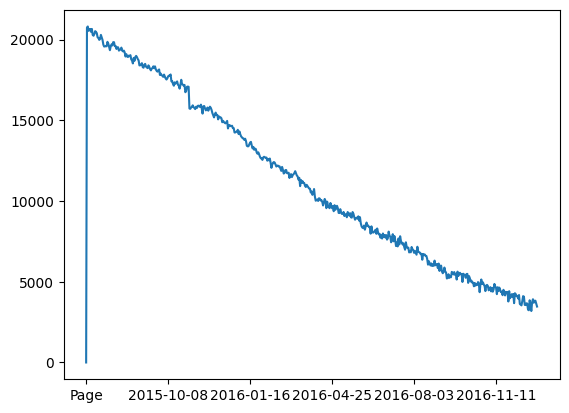

In [234]:
df.isna().sum().plot()

### Insights:
- The count missing values are high during the intial years and during the later years the missing values has reduced considerably.
- The remianing missing values could be that the page wasn't created at that point of time.

In [235]:
df_interpolated = df.copy()
df_interpolated.iloc[:, 2:] = df_interpolated.iloc[:, 2:].interpolate(method='linear', axis=1)

In [236]:
#After imputing the missing values using interpolation 
df_interpolated.isnull().sum().sum()

4724698

### Creating the langauage column

In [237]:
#Extracting the language language code from the page name
df_interpolated['language'] = df_interpolated['Page'].str.extract(r'(..)\.wikipedia\.org')

### Creating the access and device columns

In [240]:
def access(x):
    return x.split('org')[-1].split('_')[-1]

def device(x):
    return x.split('org')[-1].split('_')[-2]


In [241]:
df_interpolated['access'] = df_interpolated['Page'].apply(lambda x: access(x))
df_interpolated['device'] = df_interpolated['Page'].apply(lambda x: device(x))

### Distribution of Language, Access type and Device

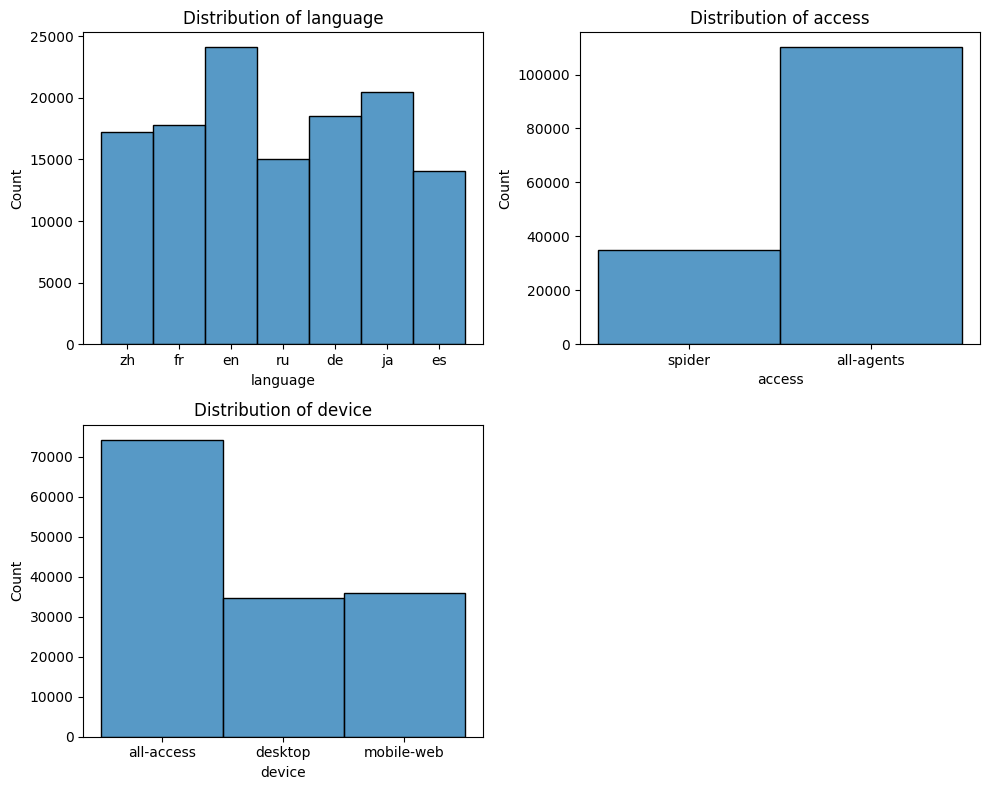

In [242]:
columns = ['language', 'access', 'device']
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2,2,i)
    sns.histplot(df_interpolated[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()
    

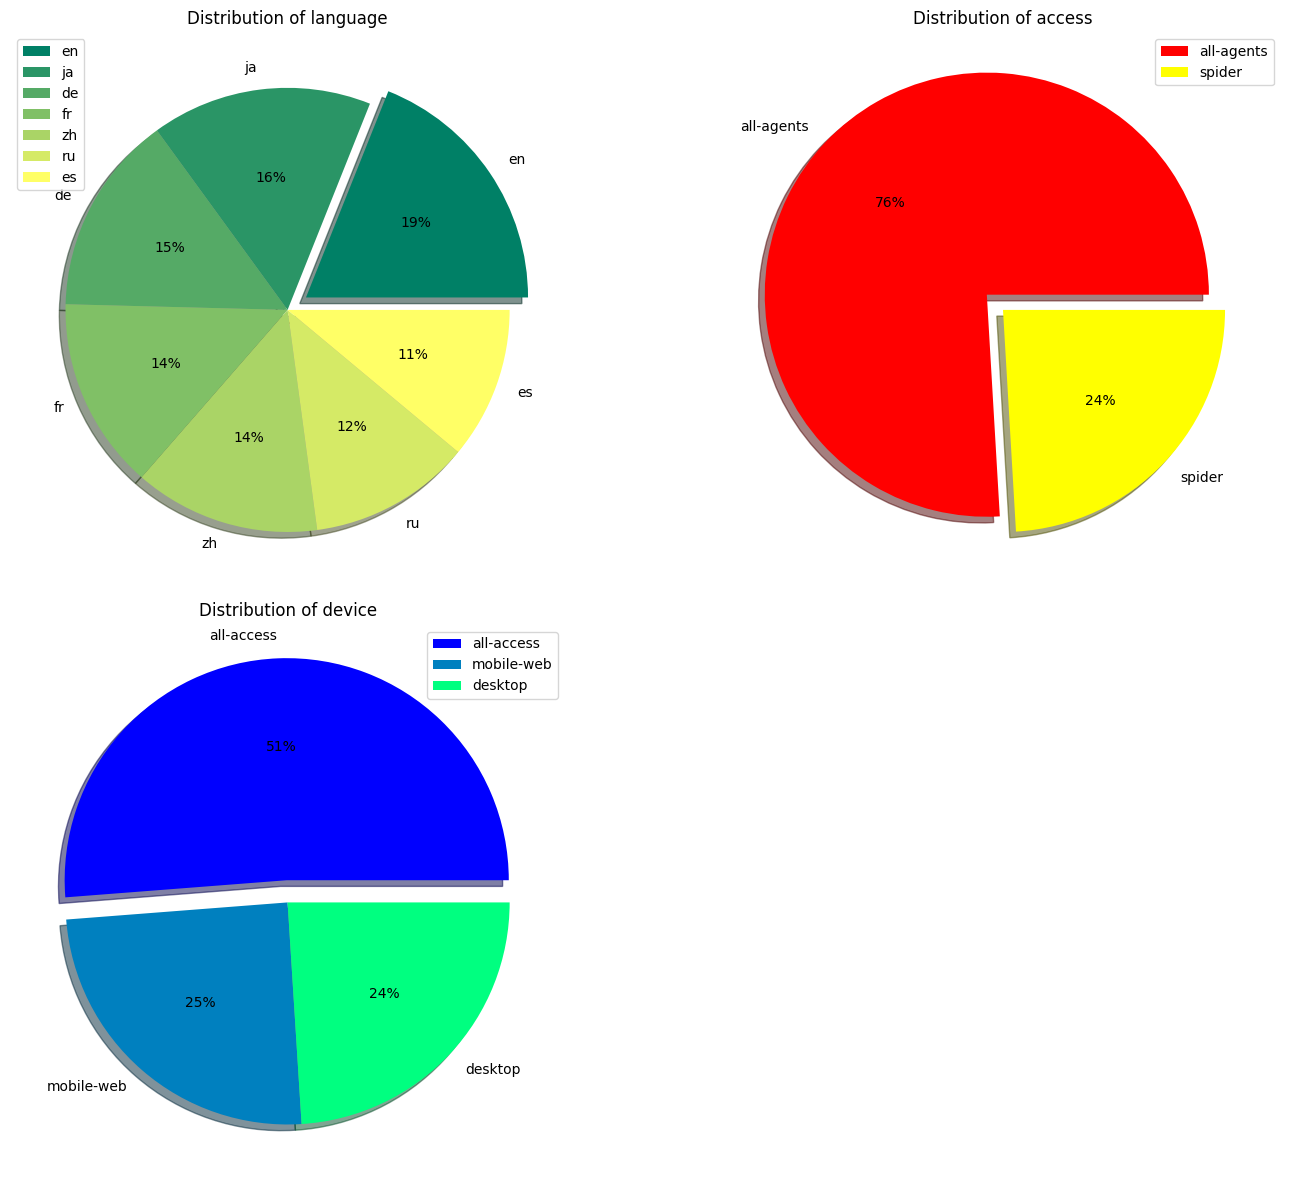

In [243]:

plt.figure(figsize=(15, 12))
explode = [(0.1, 0, 0, 0, 0,0,0), (0.1, 0), (0.1, 0, 0)]
seasons = ['summer', 'autumn', 'winter']
for i, column in enumerate(columns, 1):
    plt.subplot(2,2,i)
    df_interpolated[column].value_counts().plot(kind='pie',
                                                autopct='%1.0f%%',
                                                explode = explode[i-1],
                                                cmap=seasons[i-1],
                                                legend=True,
                                                shadow=True,
                                                ylabel='')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Insights:
- English has the highest number of pages, accounting for 19%, followed by Japanese with 16%.
- Spanish has the fewest pages, making up 11%.
- In terms of access origin, browser agents contribute 76%, while spiders account for only 24%.
- For device type, overall access is the highest at 51%, with mobile web and desktop contributing 25% and 24%, respectively.

## Preparing the data for Time Series Forecast

In [244]:
#Grouping the data by language and pivoting the data
df_lang = df_interpolated.groupby('language').sum().reset_index()

In [245]:
df_lang

language  2015-07-01  2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
0       de  13260519.0  13079896.0  1.255410e+07  1.152050e+07  1.339244e+07   
1       en  84712190.0  84438545.0  8.016828e+07  8.346402e+07  8.619961e+07   
2       es  15278553.0  14601013.0  1.342769e+07  1.260659e+07  1.371040e+07   
3       fr   8458638.0   8512952.0  8.186080e+06  8.749956e+06  8.590584e+06   
4       ja  11863200.0  13620792.0  1.230539e+07  1.545635e+07  1.482742e+07   
5       ru   9463854.0   9627643.0  8.923484e+06  8.393276e+06  8.938580e+06   
6       zh   4144988.0   4151189.0  4.123751e+06  4.163539e+06  4.441362e+06   

     2015-07-06    2015-07-07    2015-07-08    2015-07-09  ...    2016-12-22  \
0  1.474183e+07  1.429637e+07  1.450530e+07  1.396485e+07  ...  1.556695e+07   
1  9.281030e+07  8.783948e+07  8.288130e+07  8.480002e+07  ...  1.207320e+08   
2  1.562560e+07  1.523085e+07  1.478208e+07  1.450306e+07  ...  1.383893e+07   
3  8.949915e+06  8.651195e+06  8.492318e+06  8.403703e+06  ...  1.160774e+07   
4  1.292083e+07  1.256921e+07  1.249331e+07  1.217882e+07  ...  1.393296e+07   
5  9.629063e+06  9.408504e+06  9.364151e+06  9.592358e+06  ...  1.363084e+07   
6  4.464445e+06  4.459598e+06  4.576112e+06  4.548169e+06  ...  5.953810e+06   

     2016-12-23    2016-12-24    2016-12-25    2016-12-26    2016-12-27  \
0  1.575787e+07  1.523343e+07  2.395674e+07  2.257311e+07  2.032161e+07   
1  1.131460e+08  1.201003e+08  1.241672e+08  1.393524e+08  1.458688e+08   
2  1.315691e+07  1.238636e+07  1.271473e+07  1.681950e+07  1.594566e+07   
3  1.138443e+07  1.100623e+07  1.186827e+07  1.667917e+07  1.528169e+07   
4  1.991724e+07  1.764121e+07  1.686012e+07  1.605799e+07  1.626322e+07   
5  1.345359e+07  1.329489e+07  1.700078e+07  1.687838e+07  1.520146e+07   
6  5.872109e+06  6.222248e+06  6.576941e+06  6.492669e+06  6.485117e+06   

     2016-12-28    2016-12-29    2016-12-30   2016-12-31  
0  1.934873e+07  1.864384e+07  1.780198e+07   16758613.0  
1  1.415187e+08  1.507978e+08  1.256451e+08  123863157.0  
2  1.657772e+07  1.564751e+07  1.156050e+07   11078022.0  
3  1.378169e+07  1.340002e+07  1.247467e+07   11504926.0  
4  1.629067e+07  1.782265e+07  1.959063e+07   24600545.0  
5  1.416161e+07  1.364024e+07  1.222803e+07   13384332.0  
6  6.520095e+06  6.049230e+06  6.117870e+06    6305259.0  

[7 rows x 551 columns]

In [246]:
df_lang = df_lang.melt(id_vars=['language'], var_name='date', value_name='value').pivot(index='date', columns='language', values='value')

In [247]:
df_lang

language              de            en            es            fr  \
date                                                                 
2015-07-01  1.326052e+07  8.471219e+07  1.527855e+07  8.458638e+06   
2015-07-02  1.307990e+07  8.443854e+07  1.460101e+07  8.512952e+06   
2015-07-03  1.255410e+07  8.016828e+07  1.342769e+07  8.186080e+06   
2015-07-04  1.152050e+07  8.346402e+07  1.260659e+07  8.749956e+06   
2015-07-05  1.339244e+07  8.619961e+07  1.371040e+07  8.590584e+06   
...                  ...           ...           ...           ...   
2016-12-27  2.032161e+07  1.458688e+08  1.594566e+07  1.528169e+07   
2016-12-28  1.934873e+07  1.415187e+08  1.657772e+07  1.378169e+07   
2016-12-29  1.864384e+07  1.507978e+08  1.564751e+07  1.340002e+07   
2016-12-30  1.780198e+07  1.256451e+08  1.156050e+07  1.247467e+07   
2016-12-31  1.675861e+07  1.238632e+08  1.107802e+07  1.150493e+07   

language              ja            ru            zh  
date                                                  
2015-07-01  1.186320e+07  9.463854e+06  4.144988e+06  
2015-07-02  1.362079e+07  9.627643e+06  4.151189e+06  
2015-07-03  1.230539e+07  8.923484e+06  4.123751e+06  
2015-07-04  1.545635e+07  8.393276e+06  4.163539e+06  
2015-07-05  1.482742e+07  8.938580e+06  4.441362e+06  
...                  ...           ...           ...  
2016-12-27  1.626322e+07  1.520146e+07  6.485117e+06  
2016-12-28  1.629067e+07  1.416161e+07  6.520095e+06  
2016-12-29  1.782265e+07  1.364024e+07  6.049230e+06  
2016-12-30  1.959063e+07  1.222803e+07  6.117870e+06  
2016-12-31  2.460054e+07  1.338433e+07  6.305259e+06  

[550 rows x 7 columns]

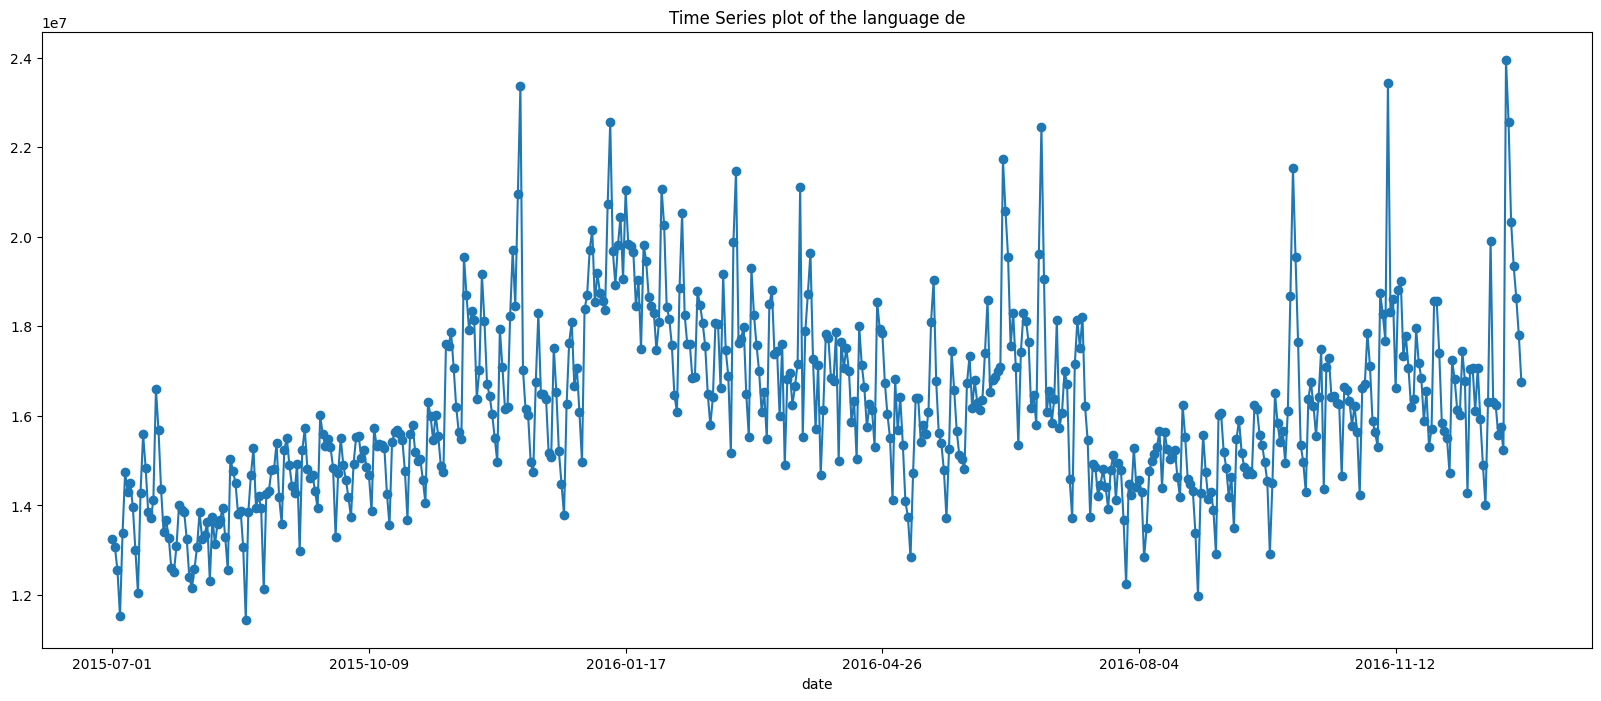

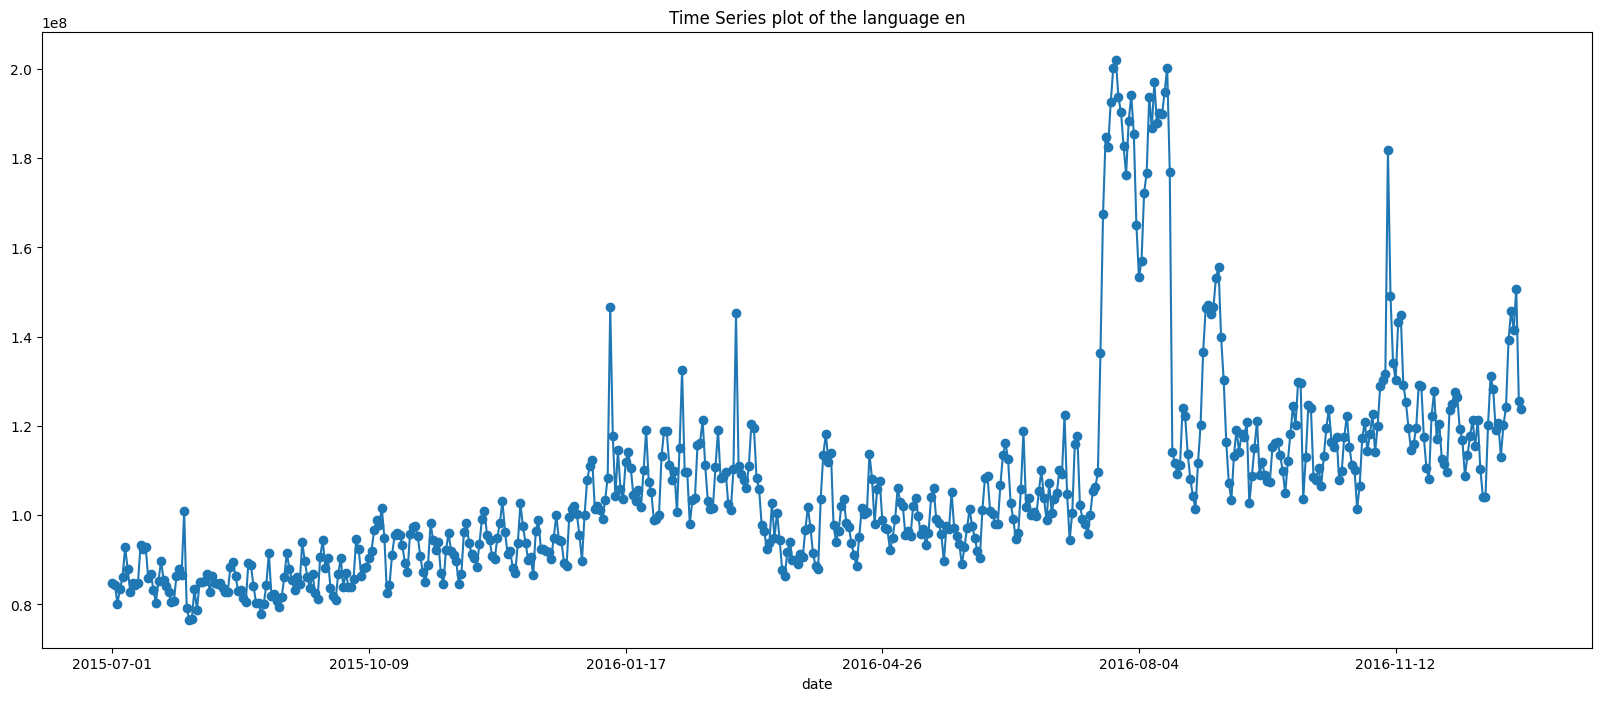

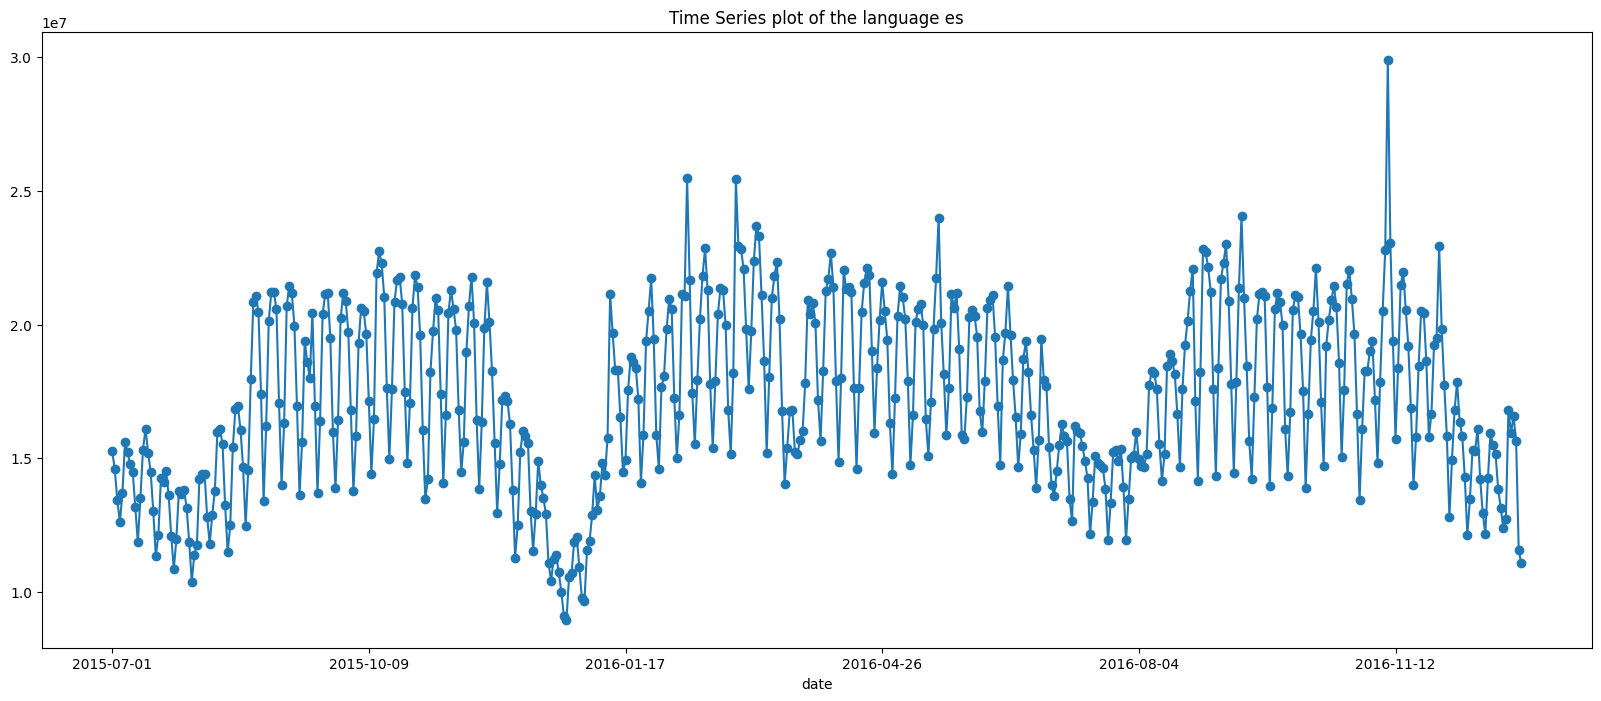

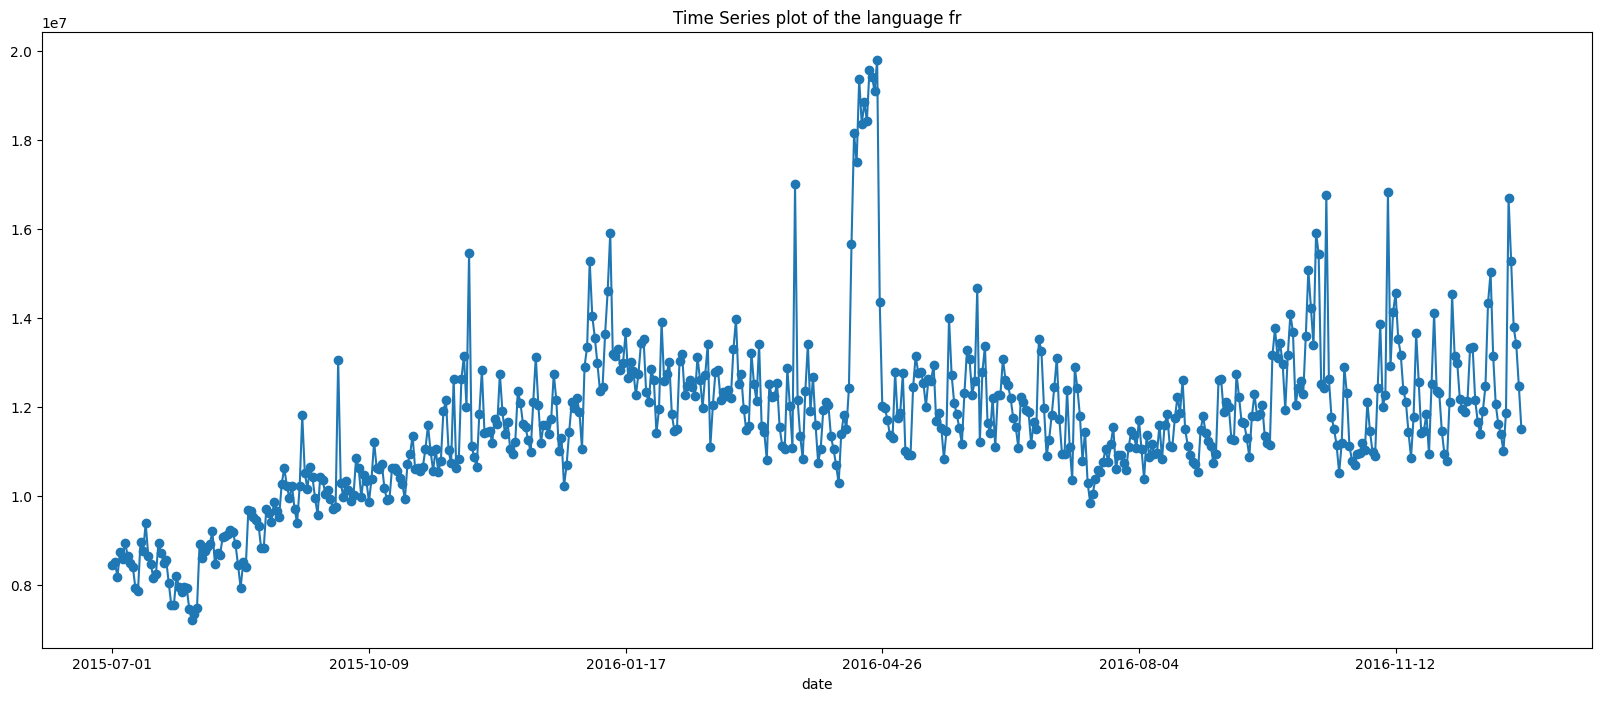

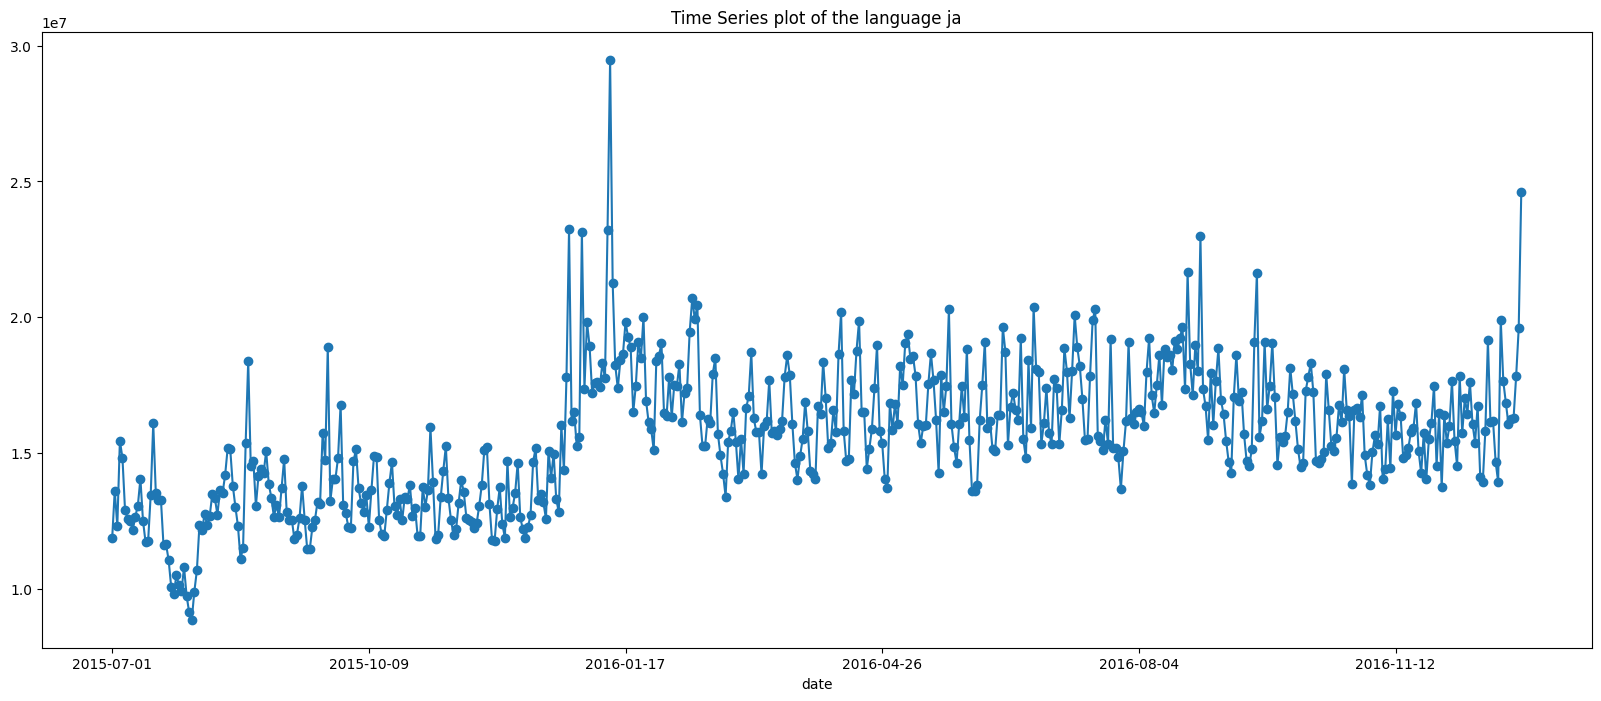

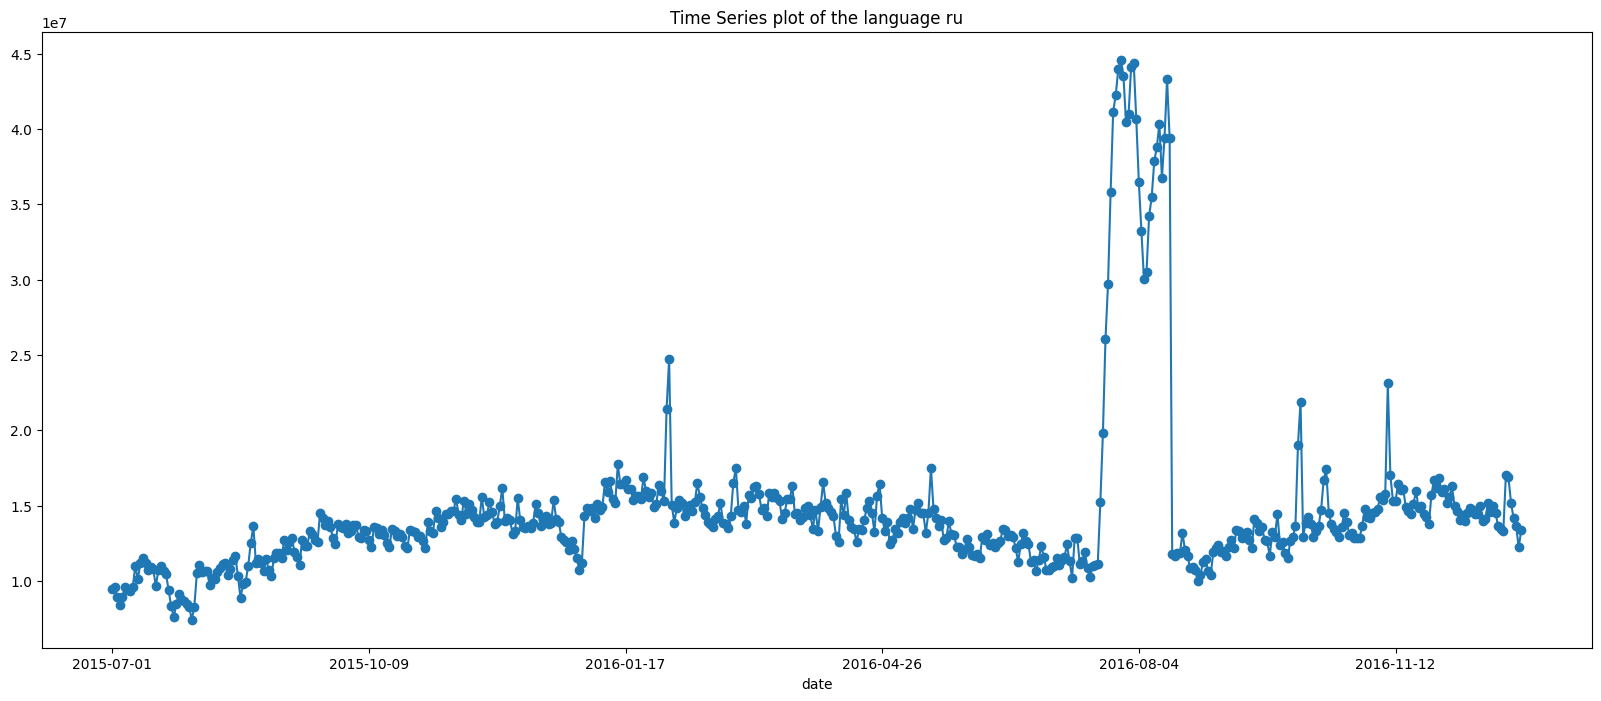

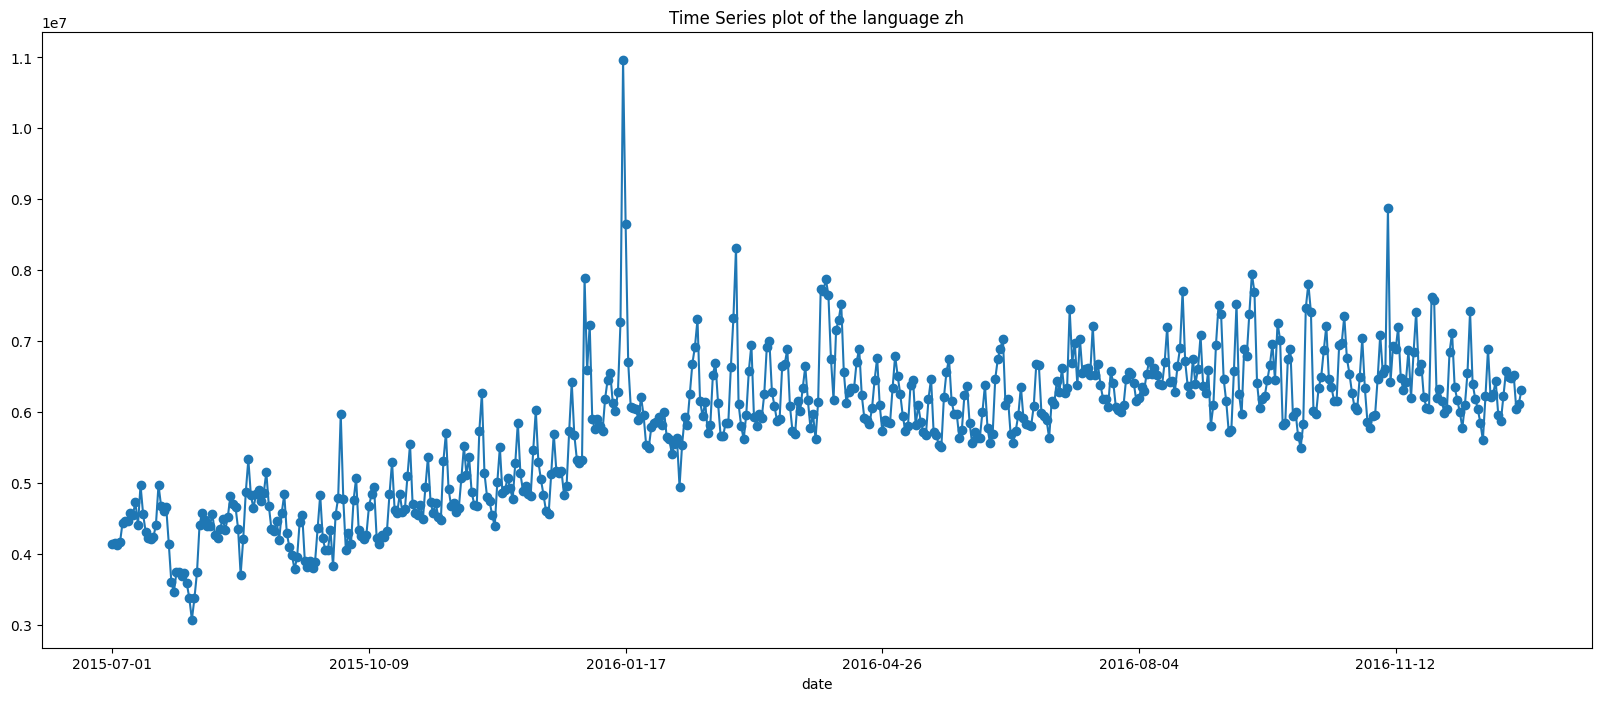

In [248]:
#Plotting the laguanges
for column in df_lang.columns:
    plt.figure(figsize=(20,8))
    df_lang[column].plot(style='-o')
    plt.title(f'Time Series plot of the language {column}')

### Clipping and plotting to remove the anomalies

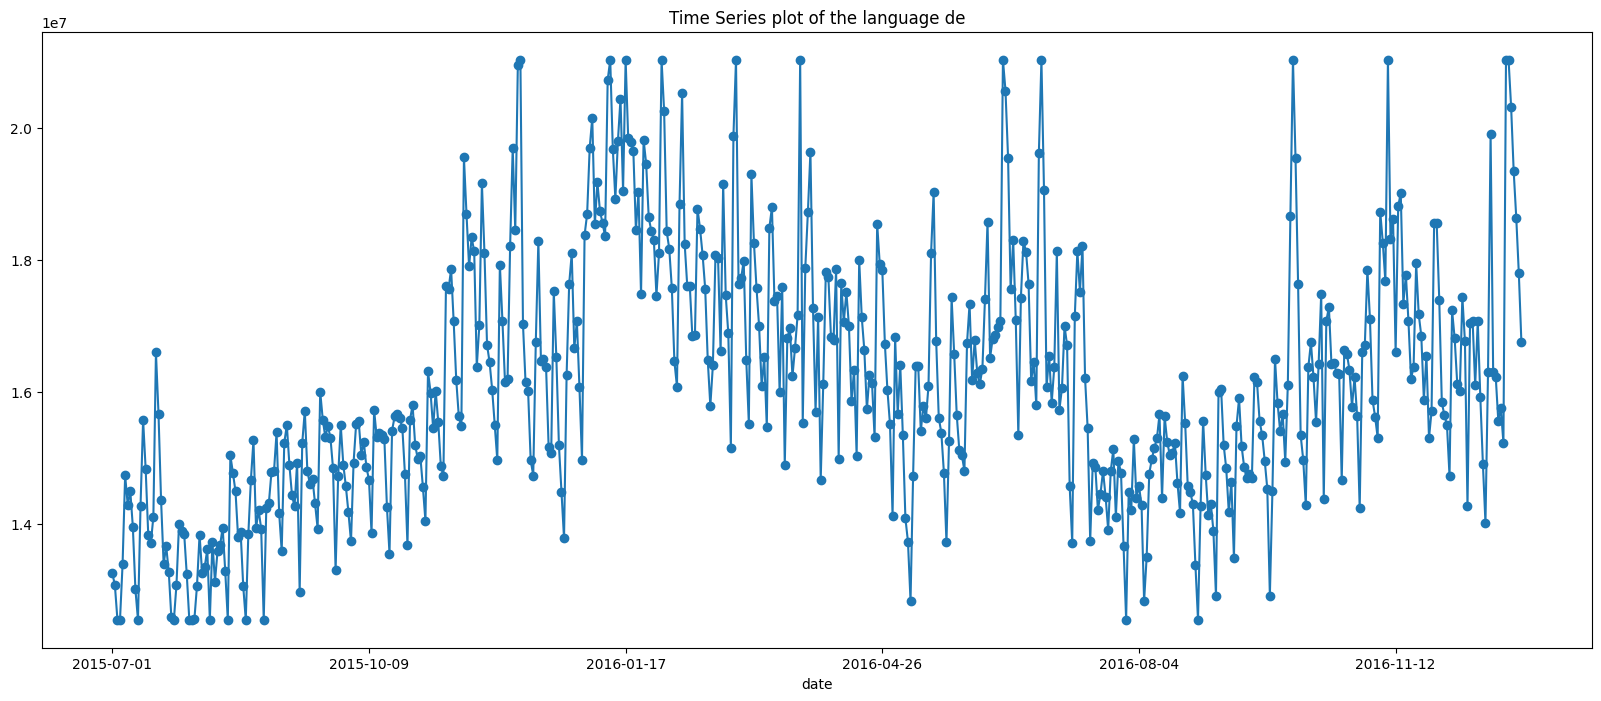

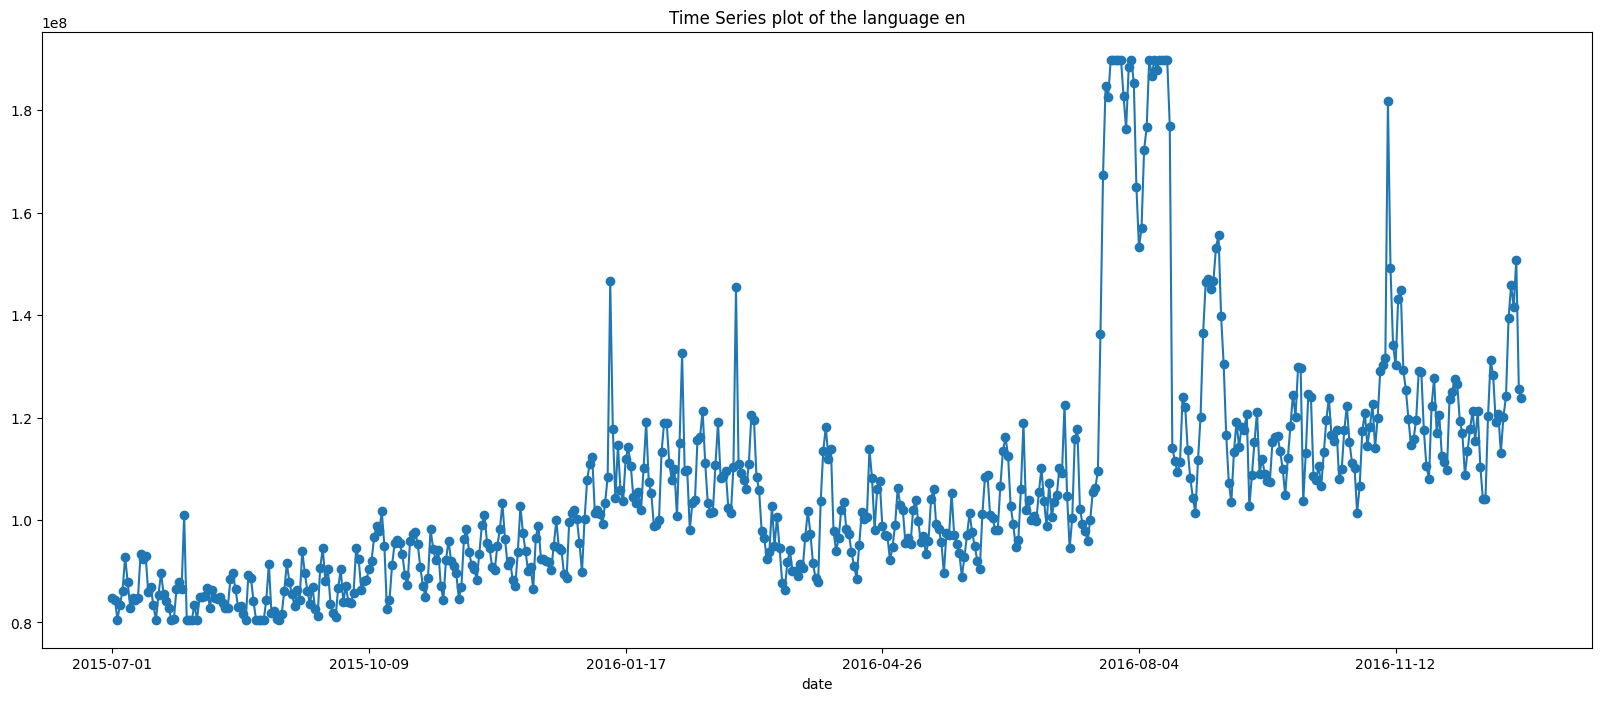

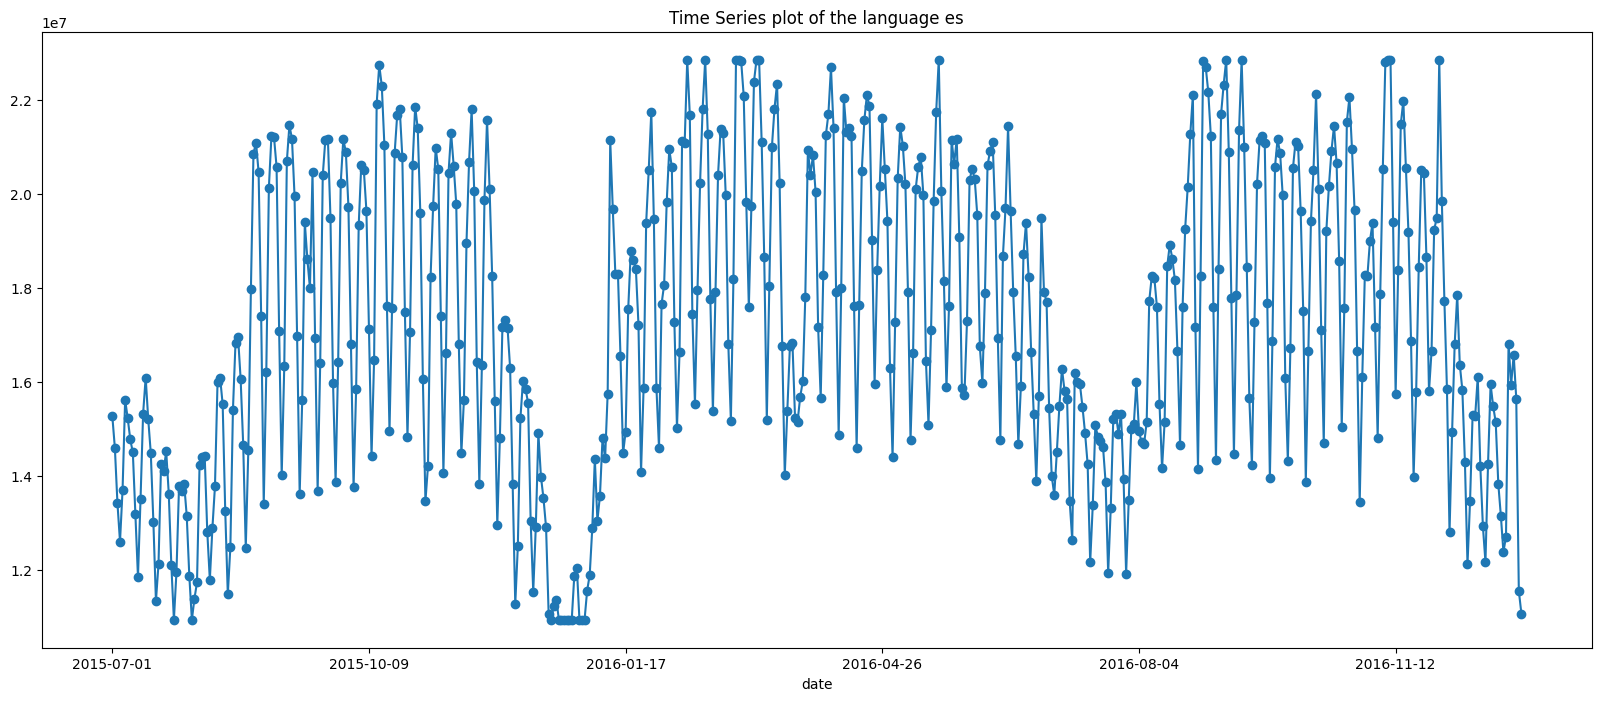

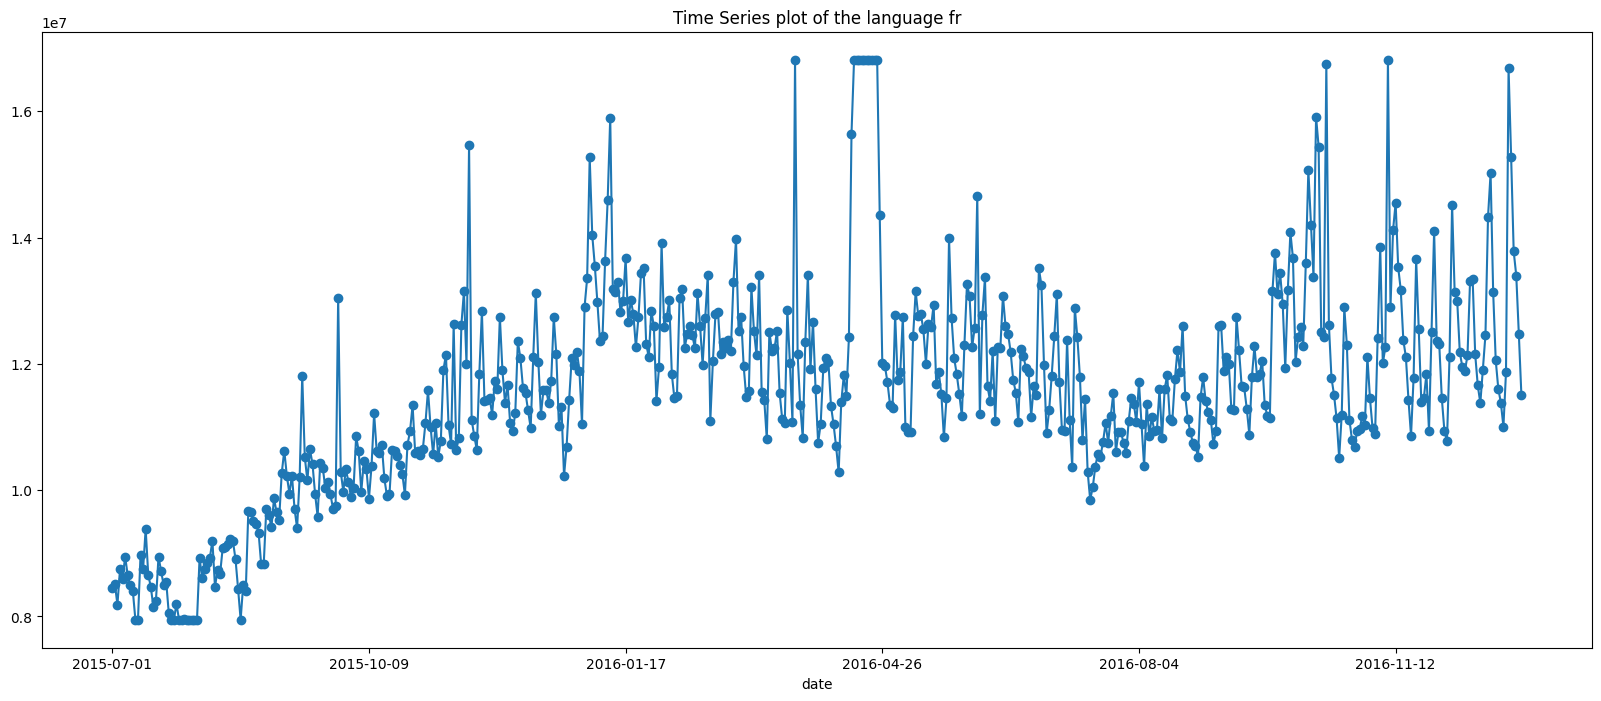

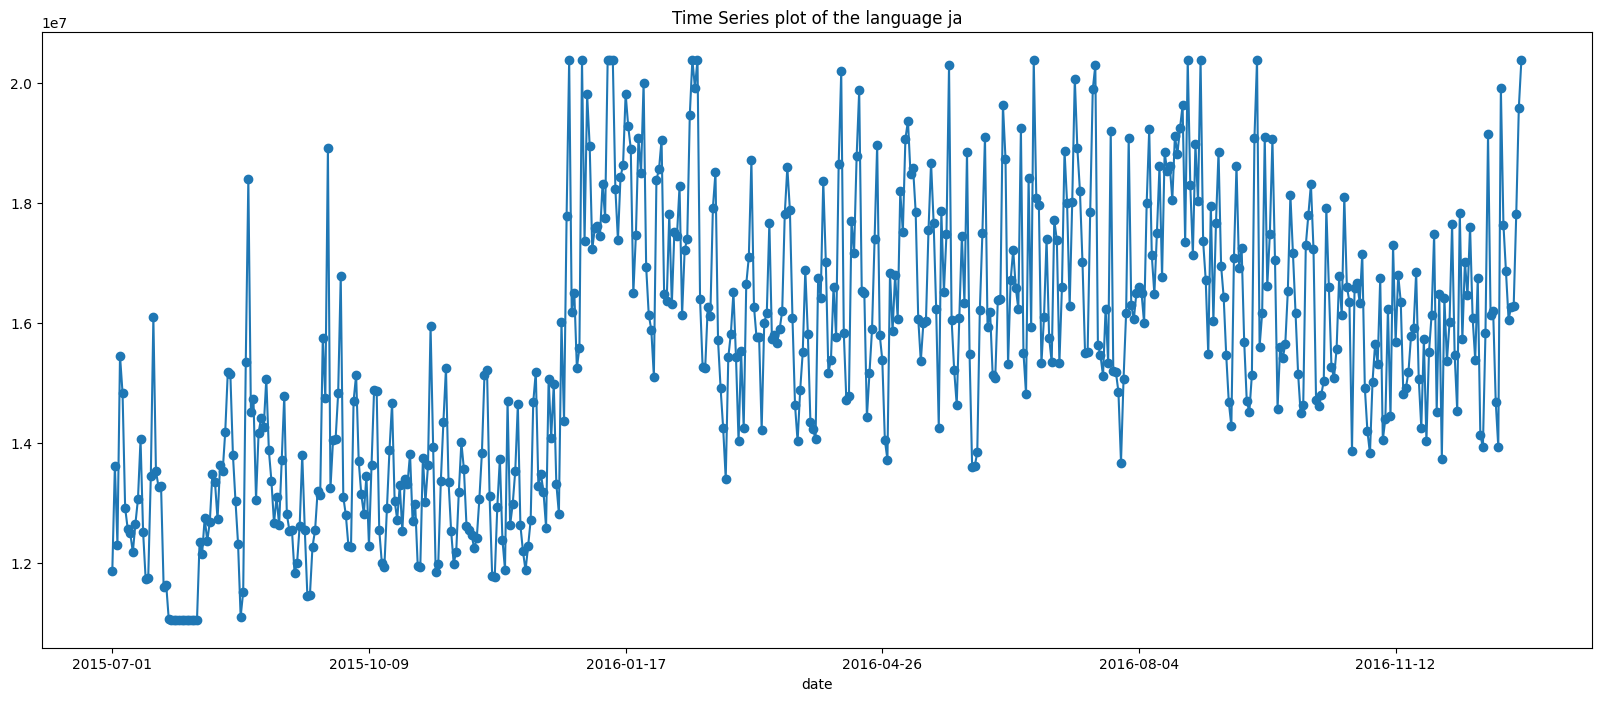

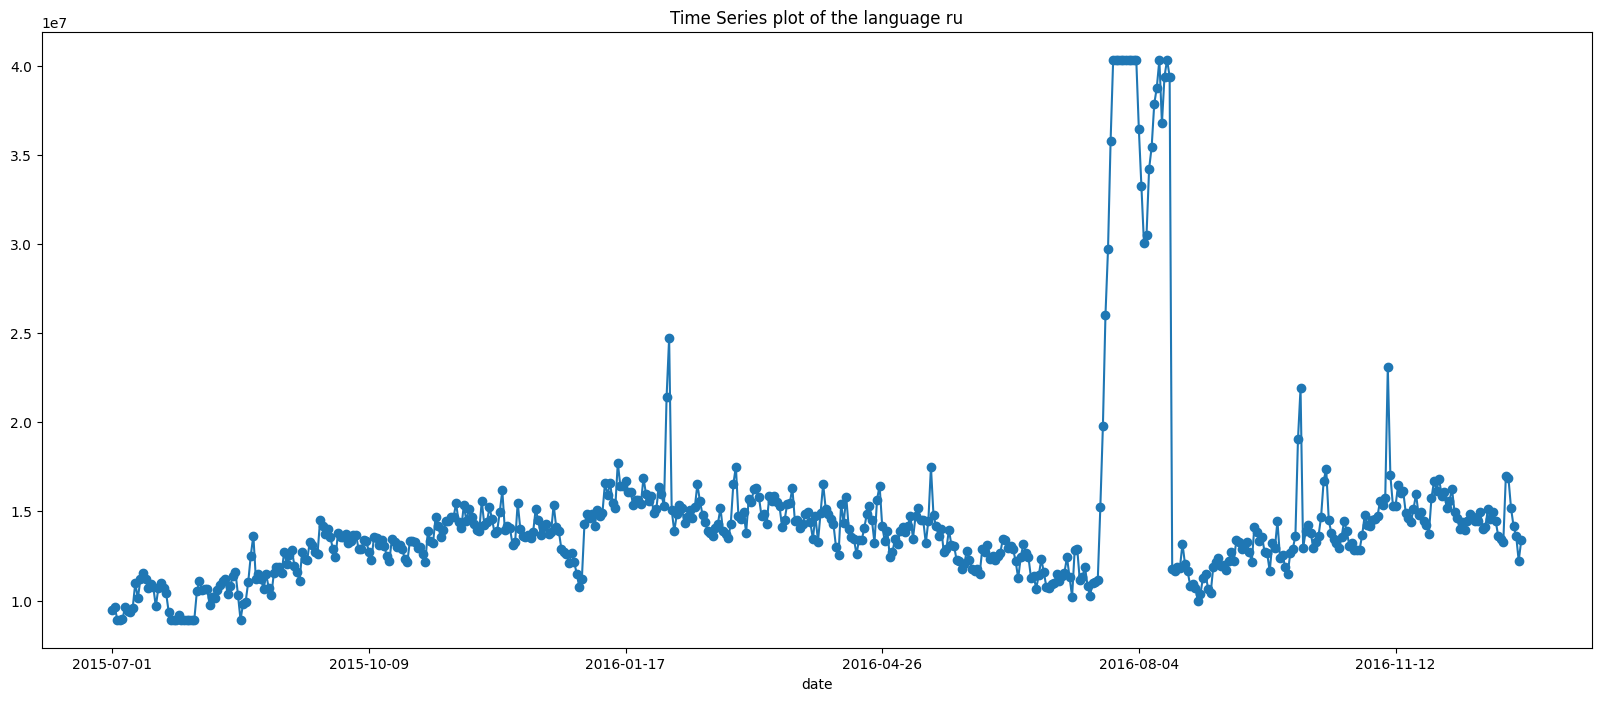

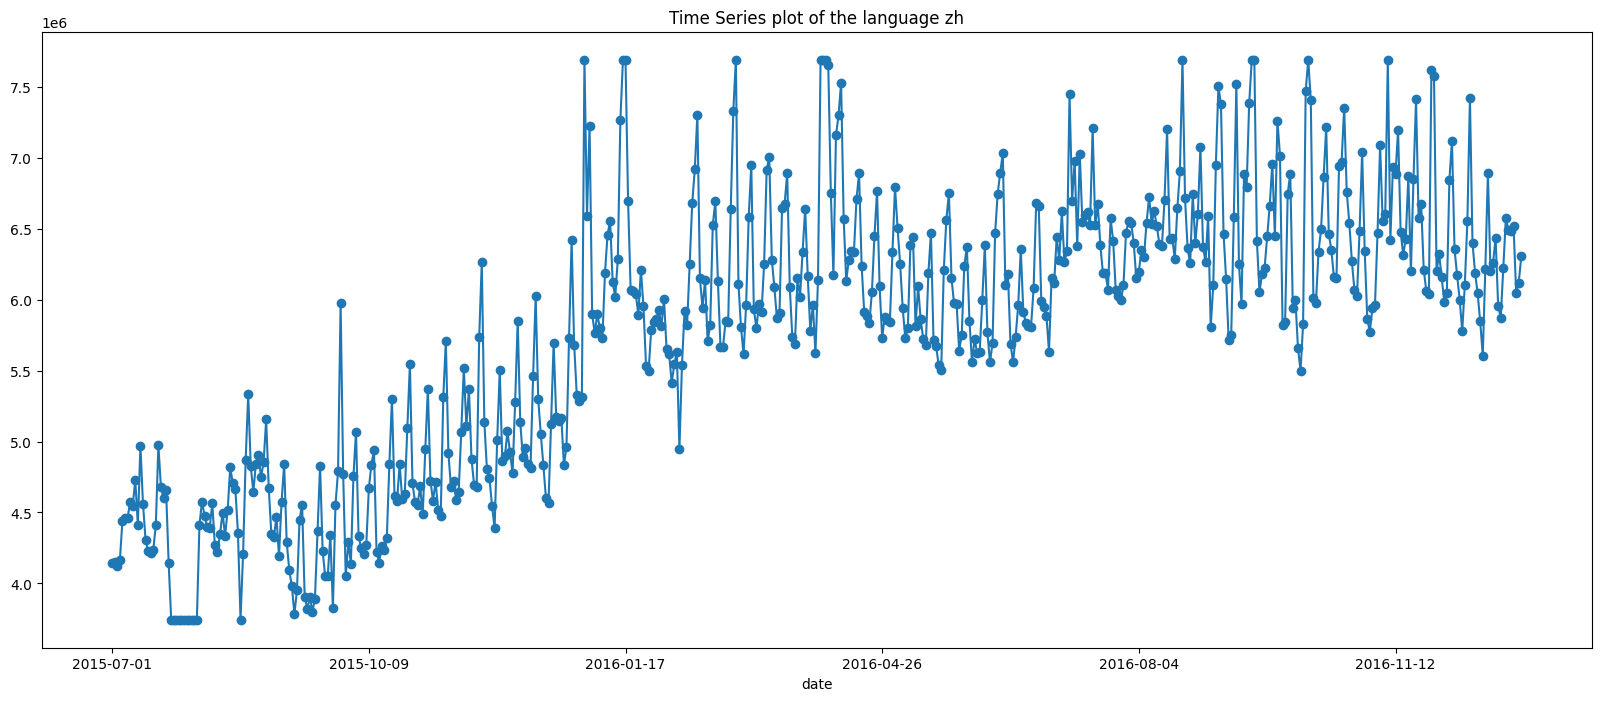

In [249]:
# Removing the anomalies using clip quantiles and plotting
for column in df_lang.columns:
    df_lang[column] = df_lang[column].clip(lower=df_lang[column].quantile(0.02), upper=df_lang[column].quantile(0.98))
    plt.figure(figsize=(20,8))
    df_lang[column].plot(style='-o')
    plt.title(f'Time Series plot of the language {column}')

## Stationary test (AdFuller test)

In [250]:
#Function to conduct stationary test
def adf_test(lang):
    p_value = sm.tsa.stattools.adfuller(lang)[1]
    if  p_value <= 0.05:
        print(f'The p_value is {round(p_value,3)}, {column} is stationary')
    else:
        print(f'The p_value is {round(p_value,3)}, {column} is not stationary')

In [251]:
for column in df_lang.columns:
    adf_test(df_lang[column])

The p_value is 0.152, de is not stationary
The p_value is 0.183, en is not stationary
The p_value is 0.029, es is stationary
The p_value is 0.127, fr is not stationary
The p_value is 0.115, ja is not stationary
The p_value is 0.001, ru is stationary
The p_value is 0.478, zh is not stationary


### Insights
- Stationary Languages: Spanish (es) and Russian (ru) have stationary time series, indicating that their statistical properties such as mean and variance do not change over time.
- Non-Stationary Languages: German (de), English (en), French (fr), Japanese (ja), and Chinese (zh) have non-stationary time series, indicating that their statistical properties change over time. For these languages, transformations or differencing may be needed to achieve stationarity before further time series analysis or modeling.

## Detrending

In [252]:
#Defining the non stationary columns
non_stationary = ['de', 'en', 'fr', 'ja', 'zh']

#Differencing the columns to detrend
df_detrend = df_lang.copy()
for column in non_stationary:
    df_detrend[column] = df_lang[column].diff()

In [253]:
#Ad fuller to crosscheck
for column in non_stationary:
    adf_test(df_detrend[column].dropna())

The p_value is 0.0, de is stationary
The p_value is 0.0, en is stationary
The p_value is 0.0, fr is stationary
The p_value is 0.0, ja is stationary
The p_value is 0.0, zh is stationary


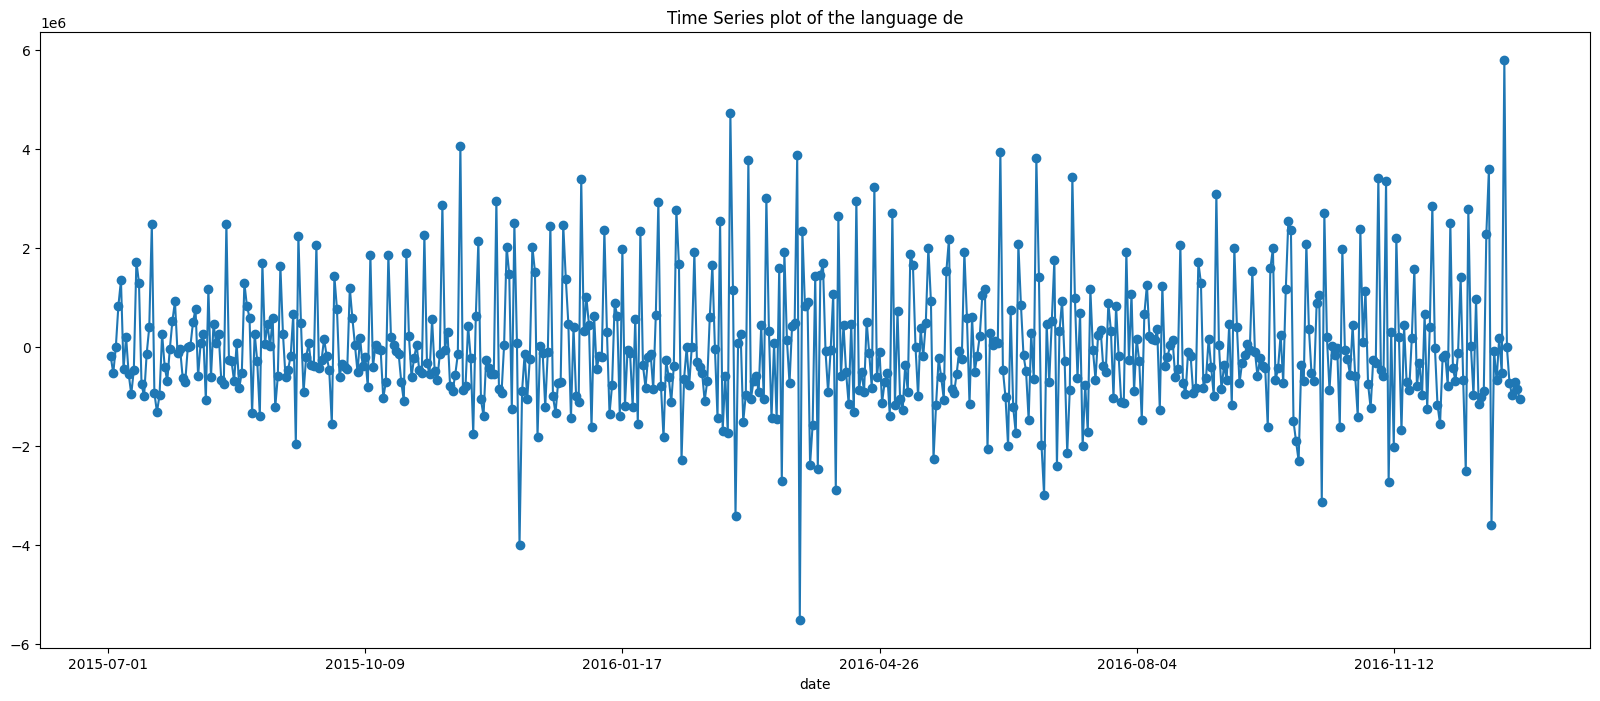

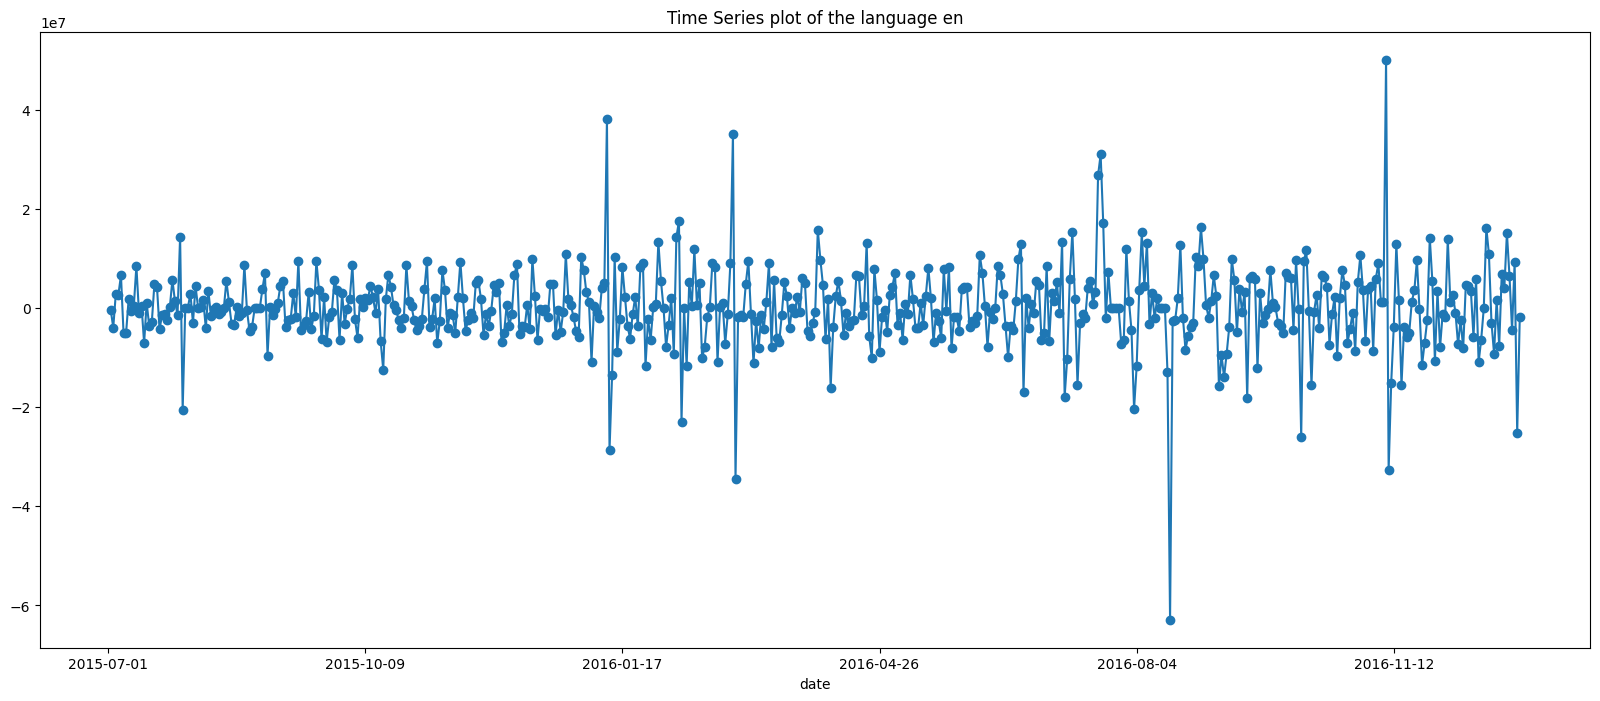

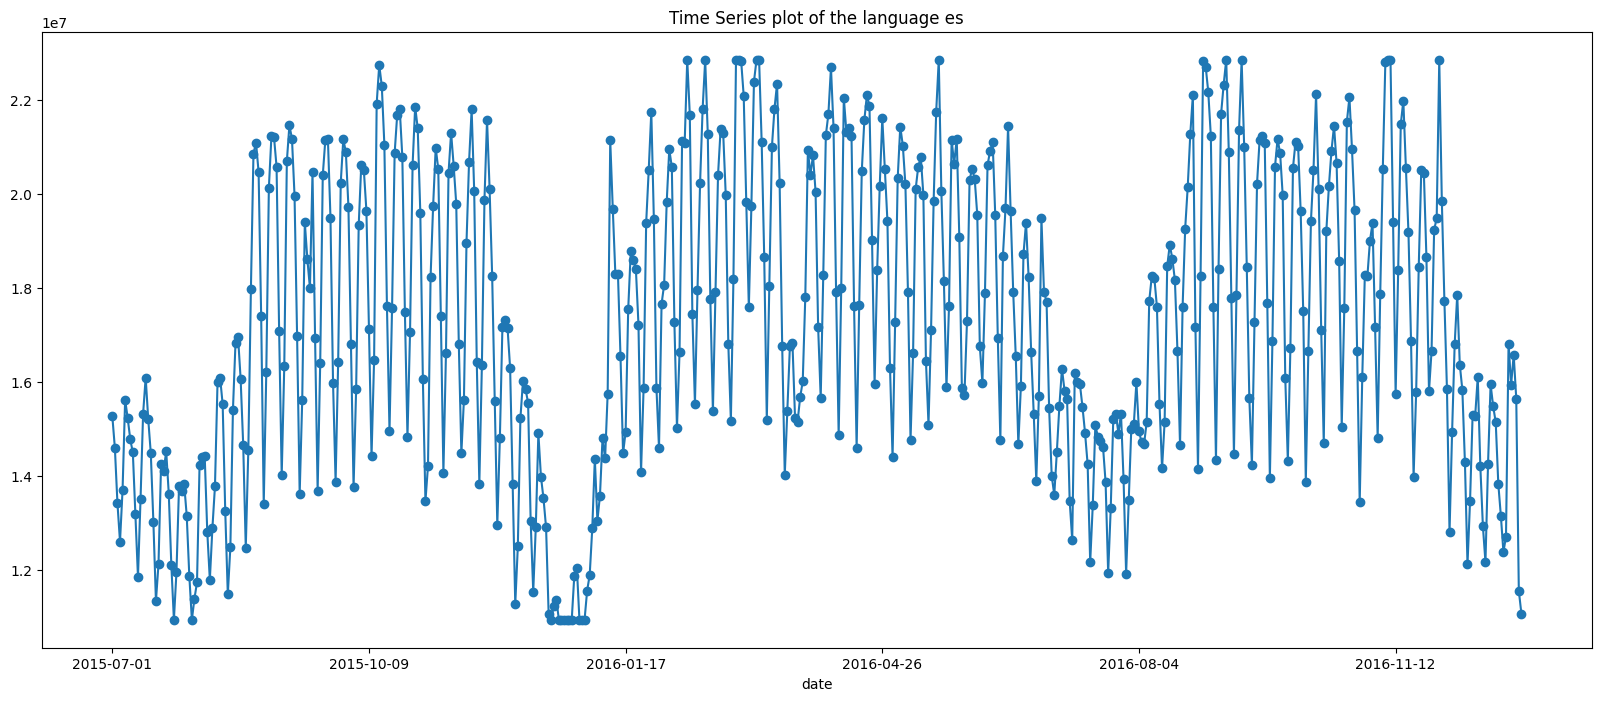

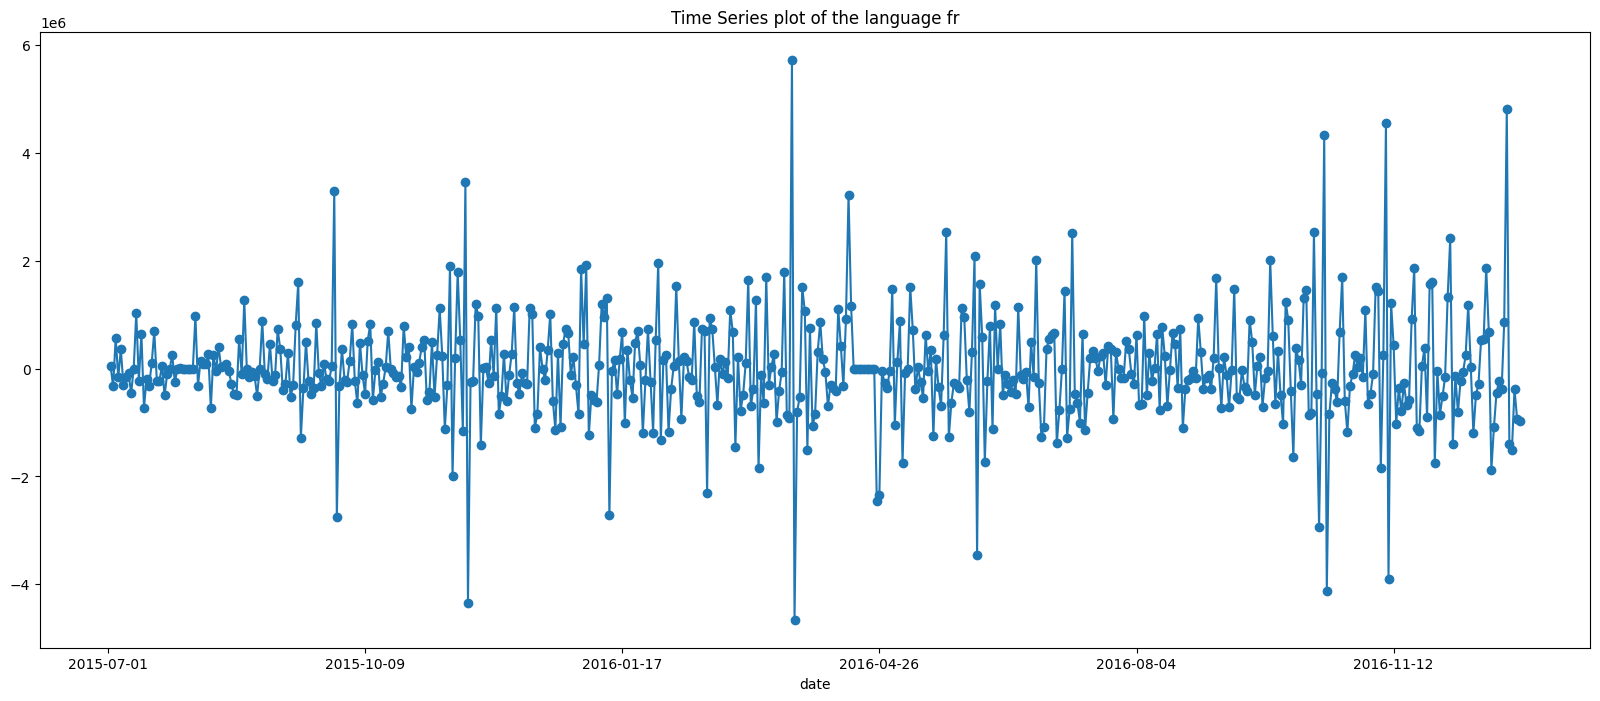

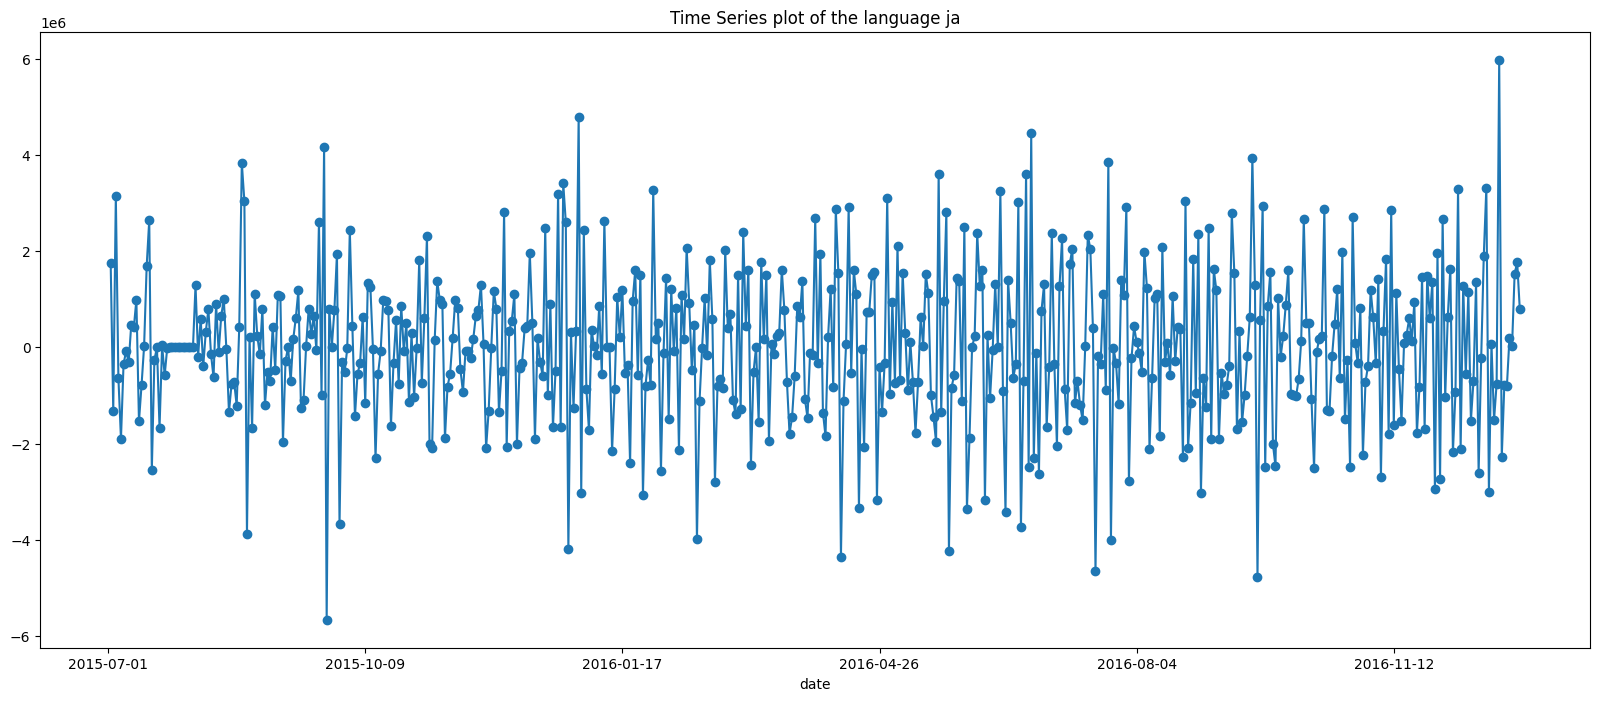

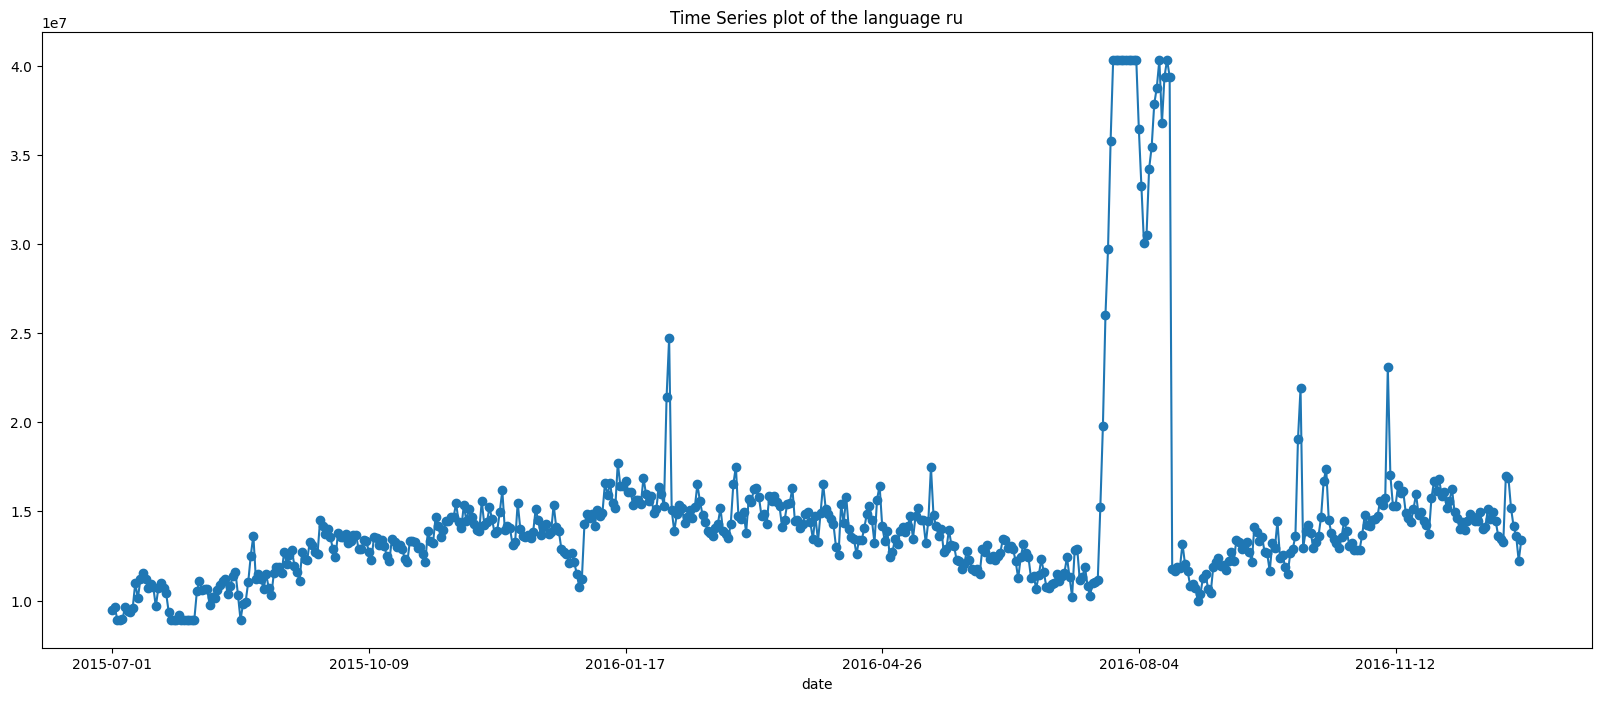

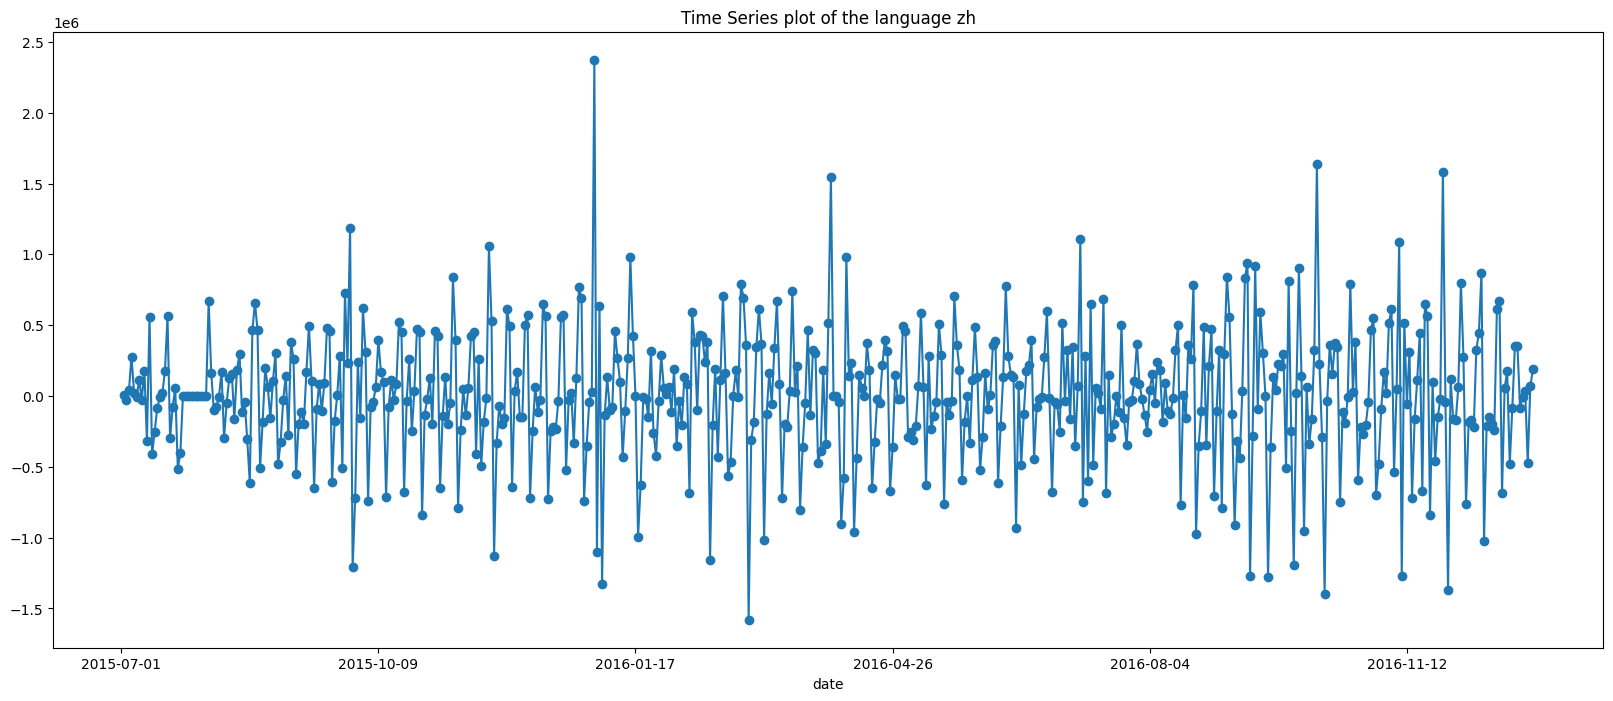

In [254]:
#Plotting the detrended dataset
for column in df_detrend.columns:
    plt.figure(figsize=(20,8))
    df_detrend[column].plot(style='-o')
    plt.title(f'Time Series plot of the language {column}')

## De-seasonalising

In [255]:
#Differencing the columns to deseasonalising the dataset
df_deseason = df_detrend.copy()
for column in df_deseason:
    df_deseason[column] = df_detrend[column].diff(30)

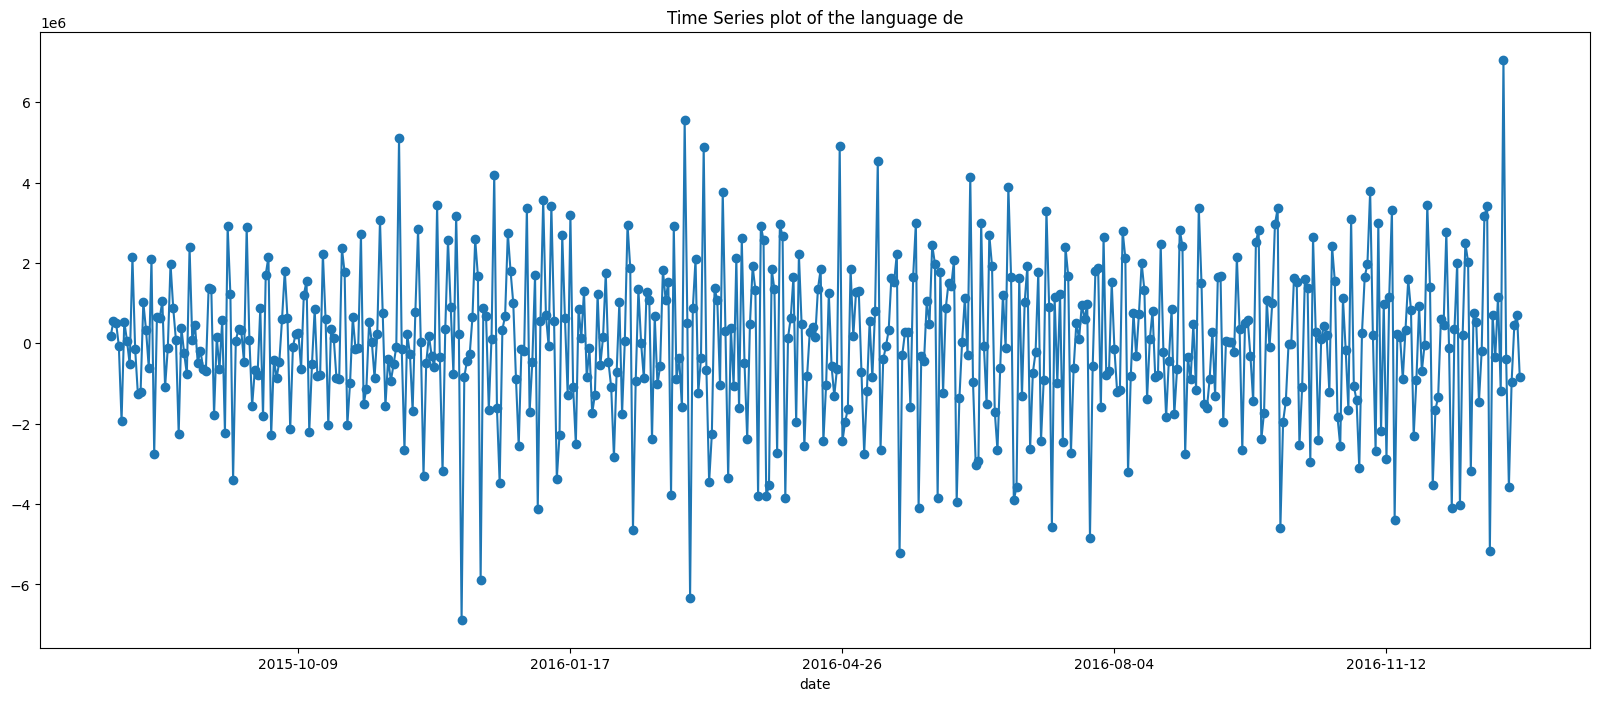

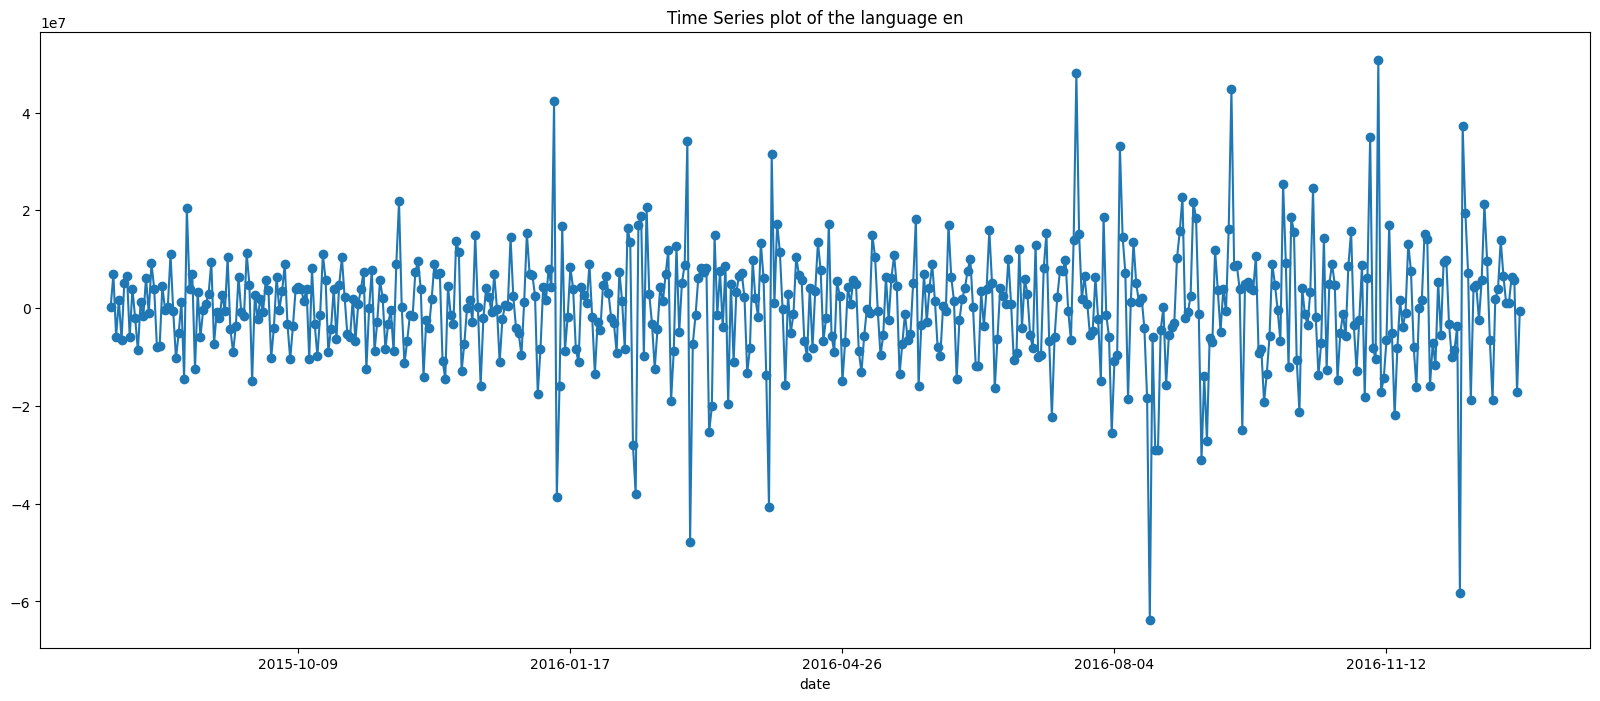

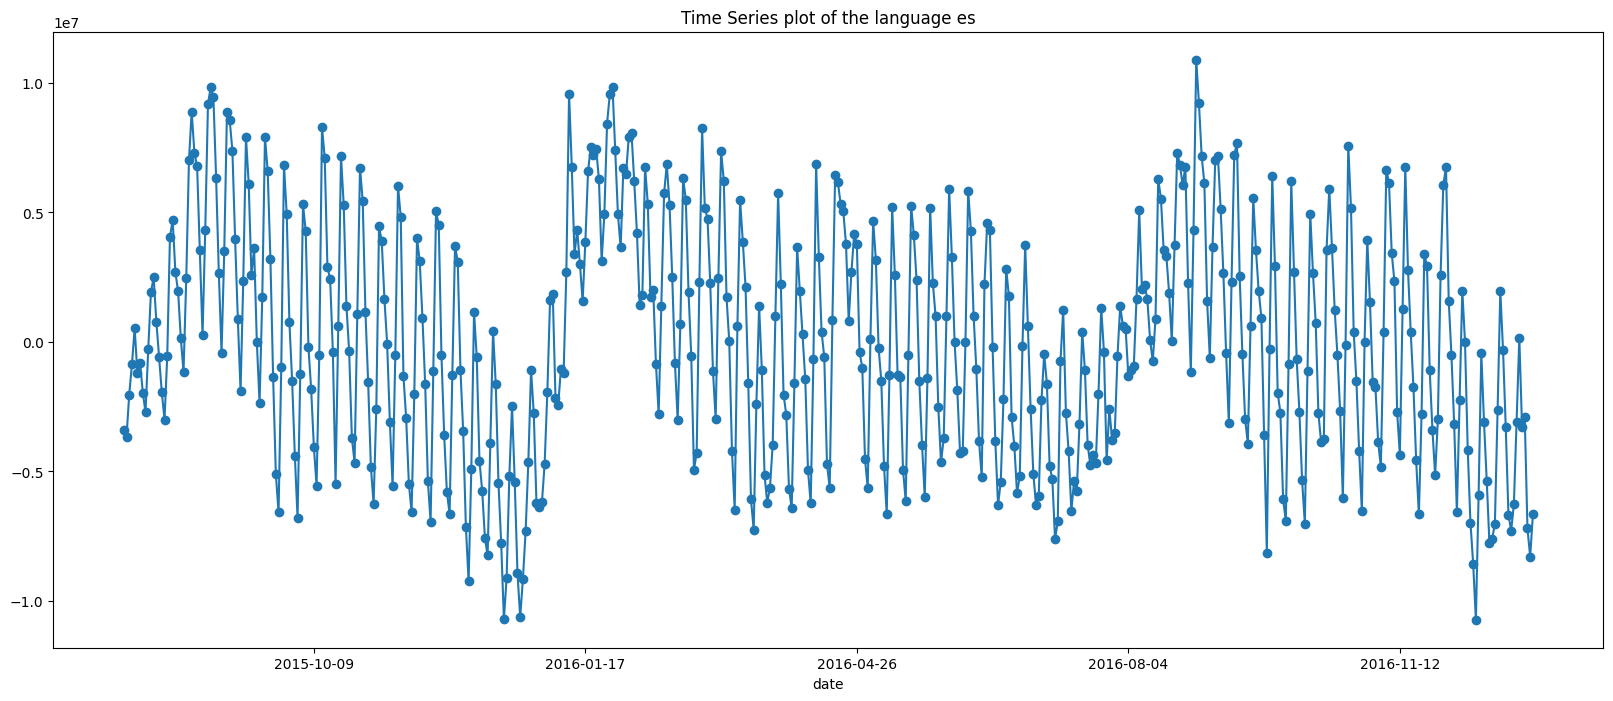

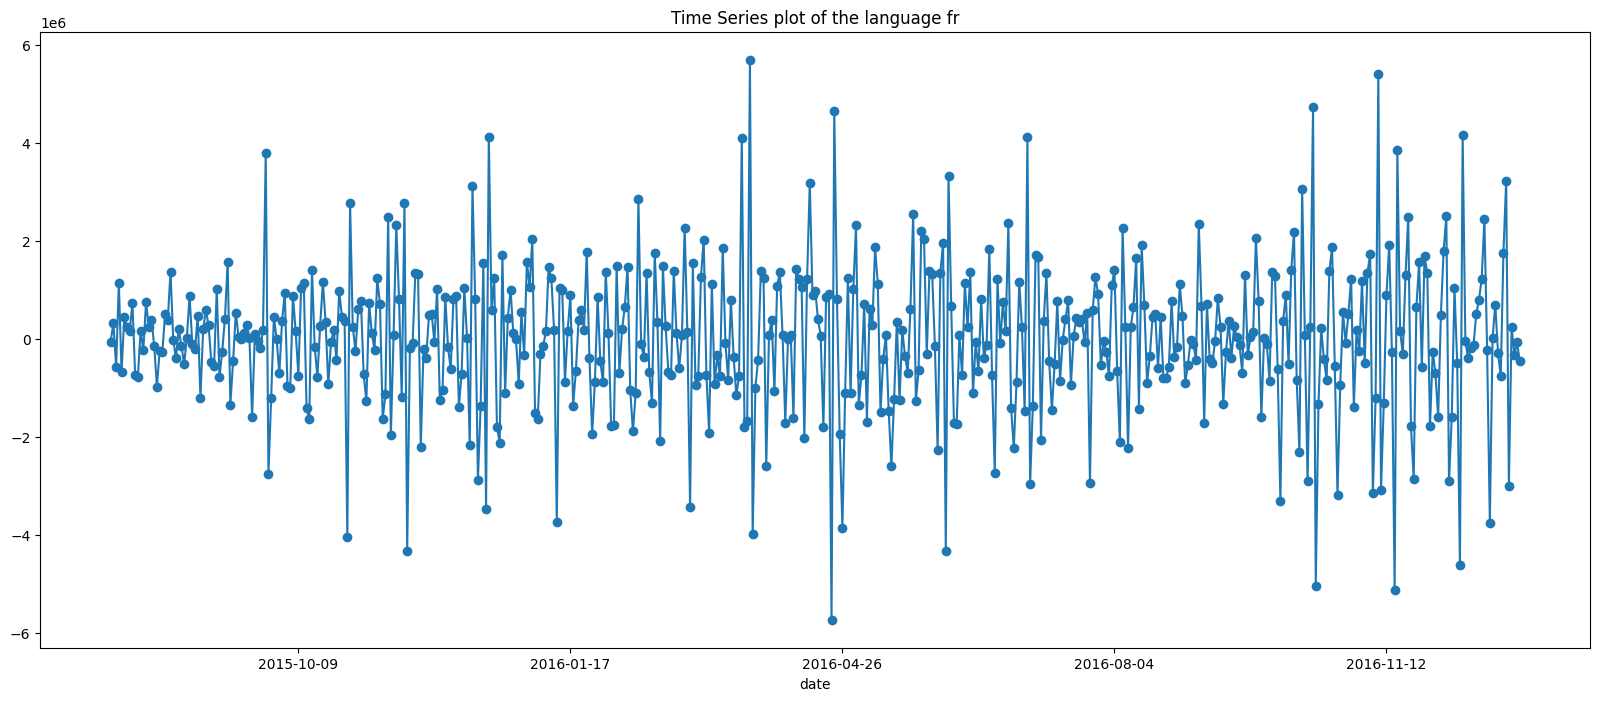

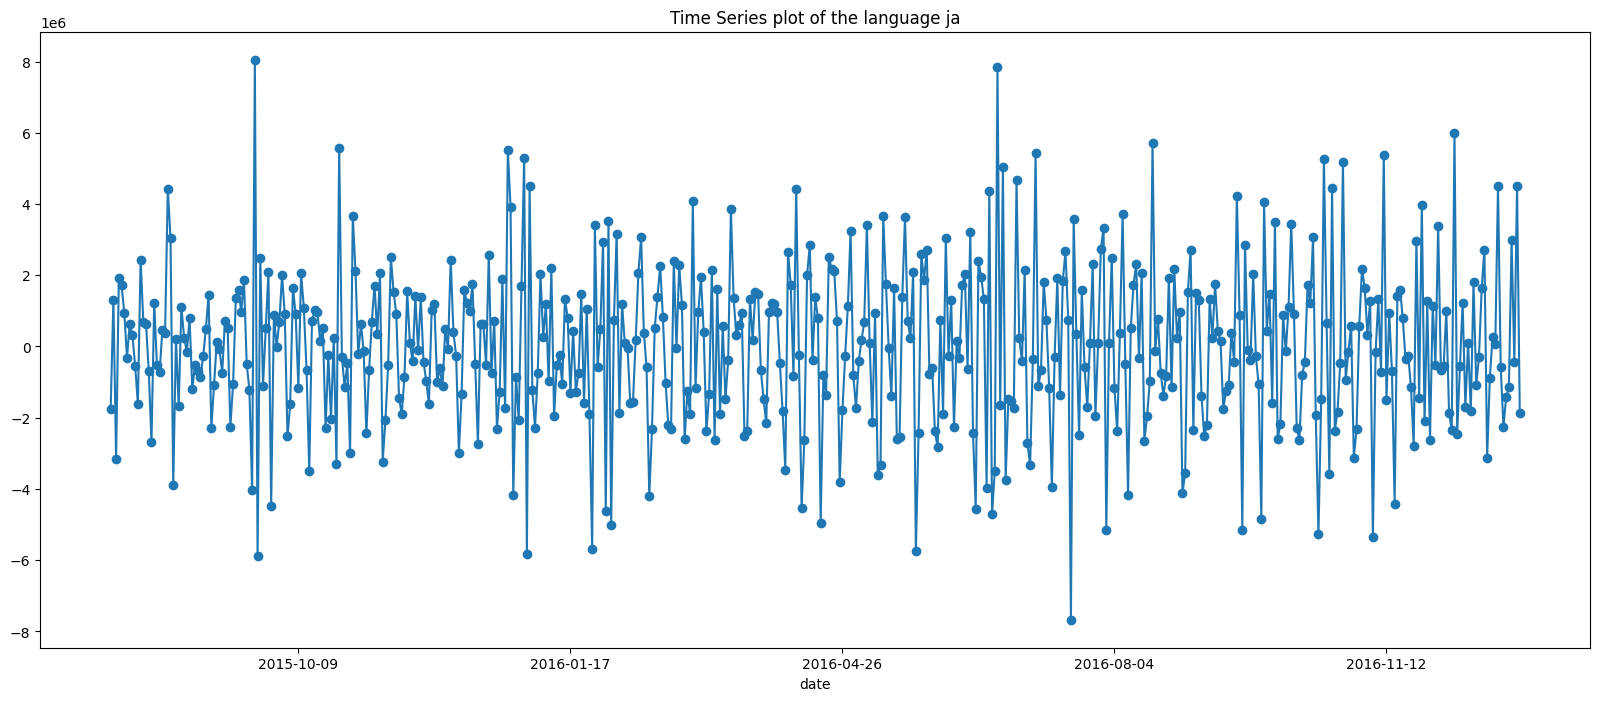

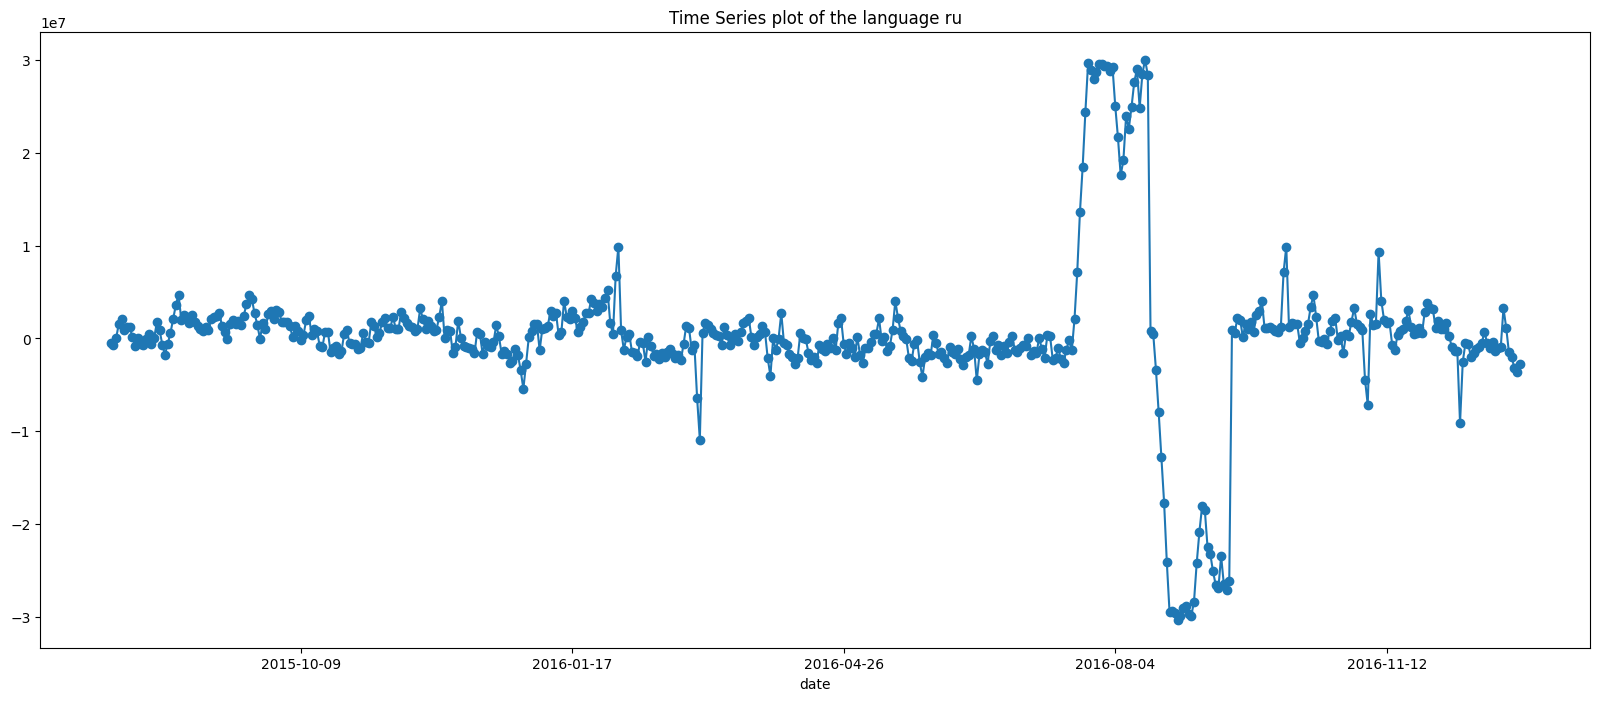

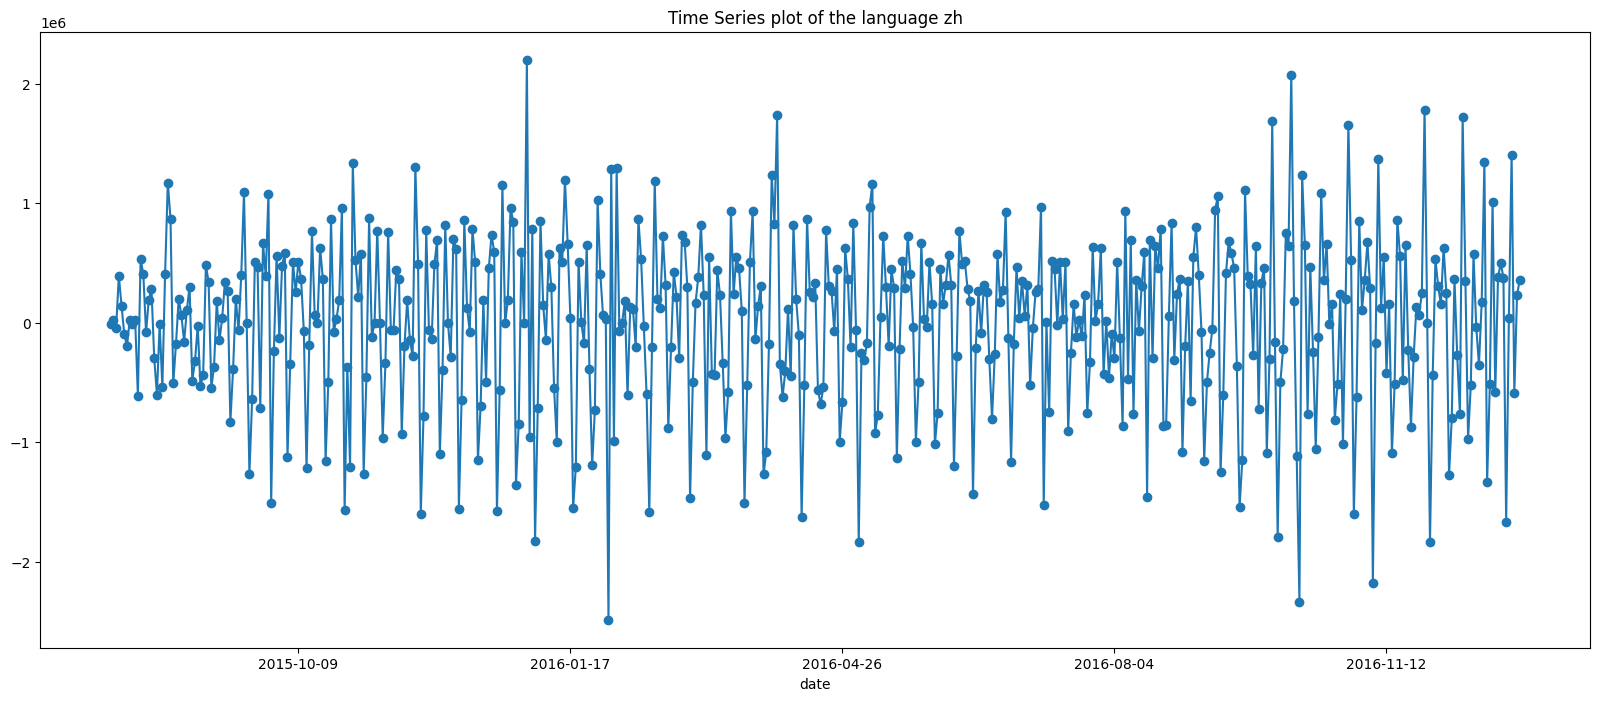

In [256]:
#Plotting the deseasoned dataset
for column in df_deseason.columns:
    plt.figure(figsize=(20,8))
    df_deseason[column].plot(style='-o')
    plt.title(f'Time Series plot of the language {column}')

## Plotting ACF and PACF plots

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 2000x800 with 0 Axes>

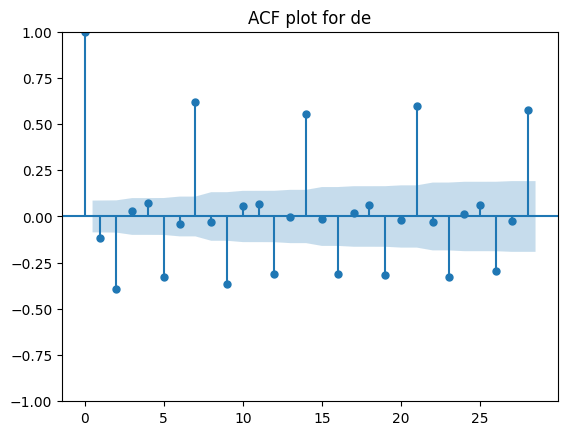

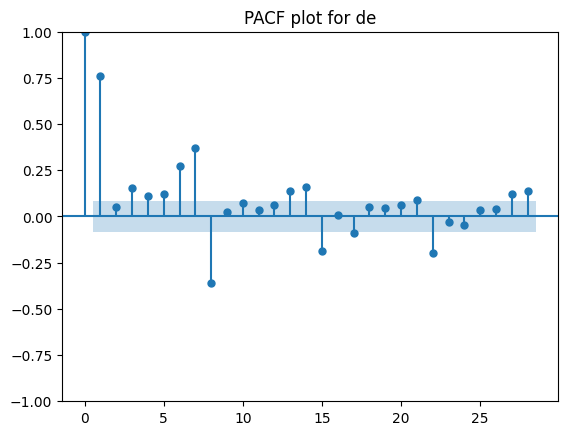

<Figure size 2000x800 with 0 Axes>

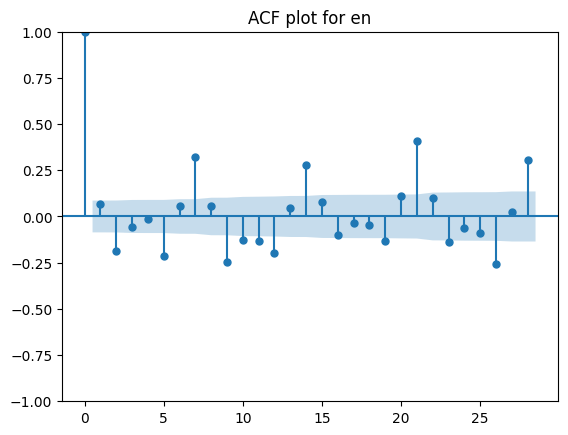

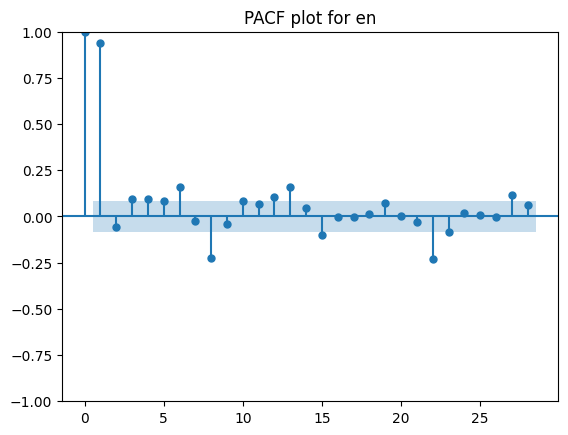

<Figure size 2000x800 with 0 Axes>

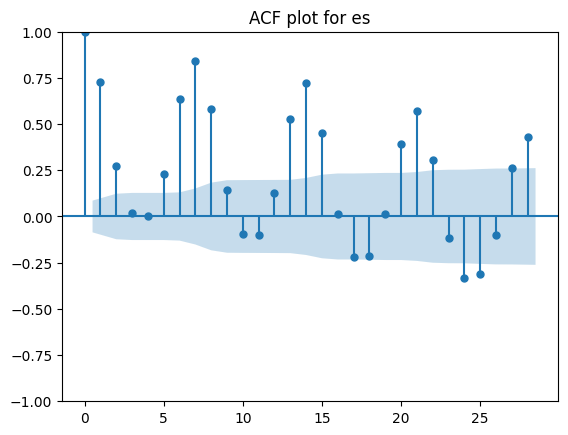

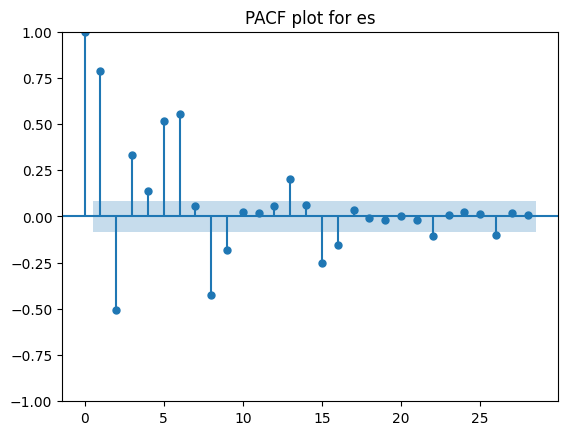

<Figure size 2000x800 with 0 Axes>

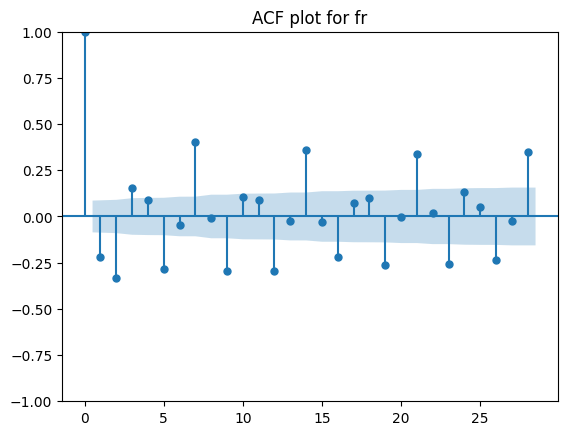

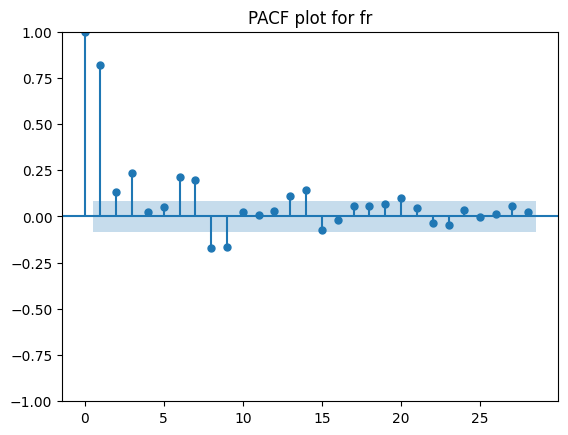

<Figure size 2000x800 with 0 Axes>

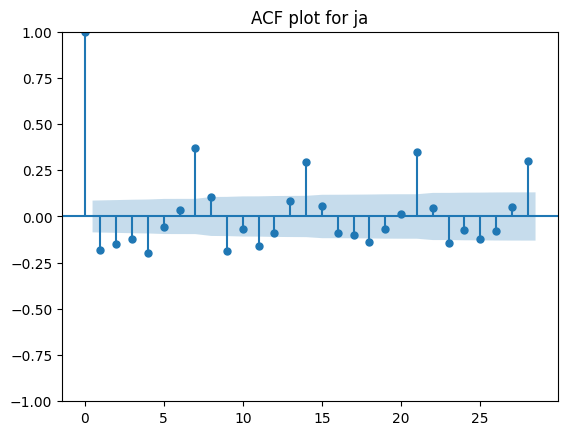

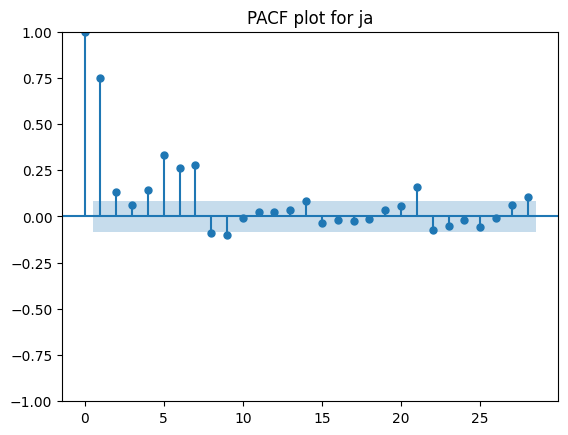

<Figure size 2000x800 with 0 Axes>

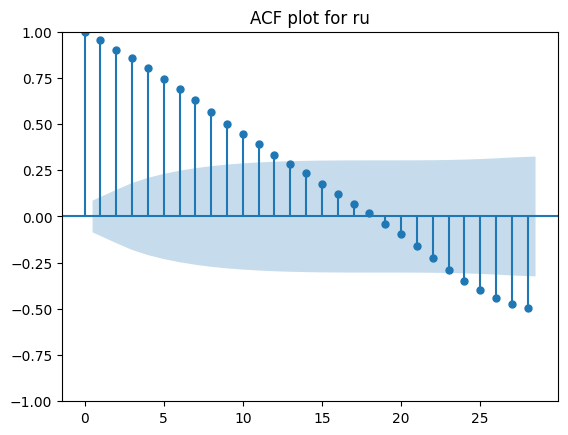

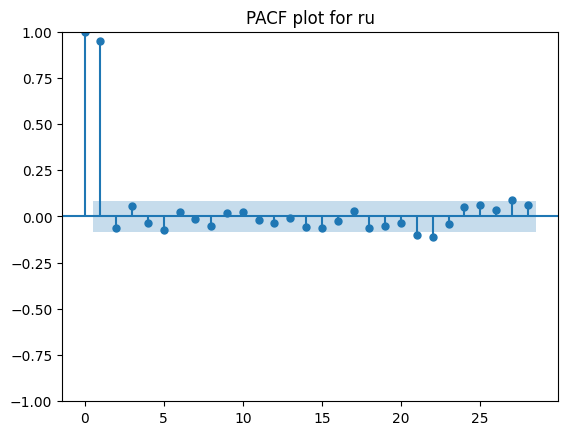

<Figure size 2000x800 with 0 Axes>

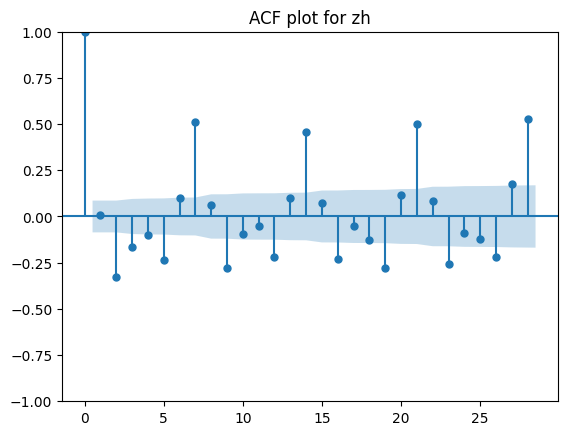

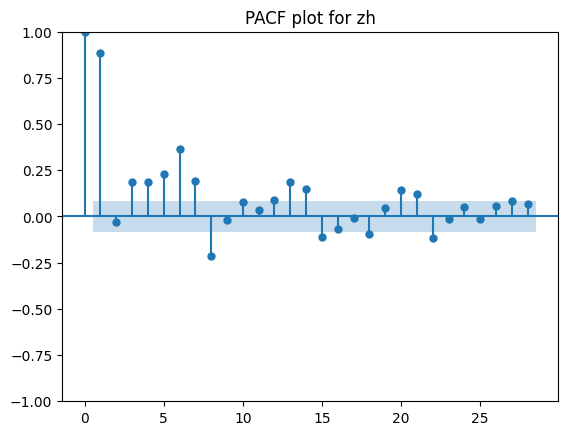

In [257]:
#Plotting ACF plots
for column in df_deseason.columns:
    plt.figure(figsize=(20,8))
    plot_acf(df_deseason[column].dropna())
    plt.title(f'ACF plot for {column}')
    plot_pacf(df_lang[column])
    plt.title(f'PACF plot for {column}')
    

In [495]:
#Splitting the data into train and test
for column in df_lang.columns:
    train_x_var = f'{column}_train_x'
    test_x_var = f'{column}_test_x'
    
    globals()[train_x_var] = pd.DataFrame(df_lang[column][:-21])
    globals()[test_x_var] = pd.DataFrame(df_lang[column][-21:])

In [498]:
# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

## Building the SARIMAX model for English Language

In [502]:
#Splitting the data into train and test including two seasons in the data
train_x = pd.DataFrame(df_lang['en'][:-21])
test_x = pd.DataFrame(df_lang['en'][-21:])

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for en')

<Figure size 2000x800 with 0 Axes>

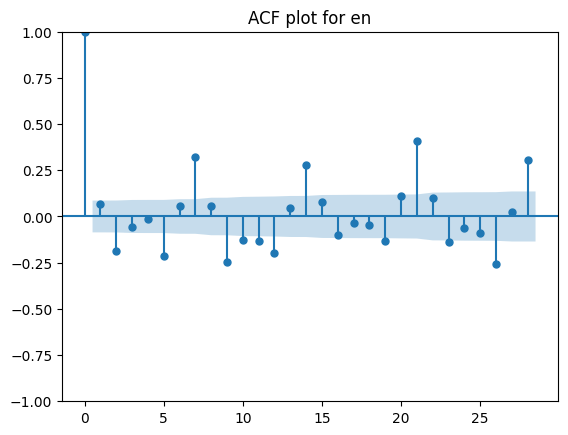

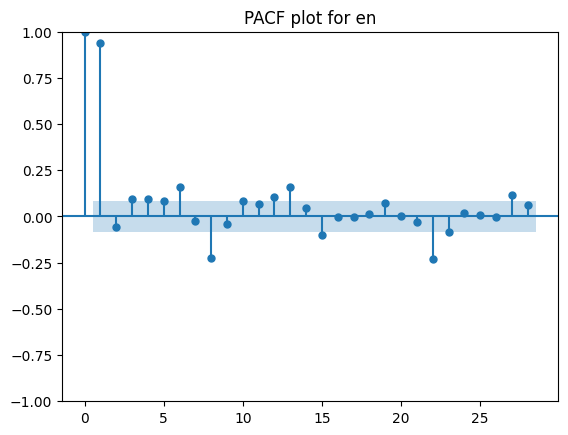

In [385]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['en'].dropna())
plt.title(f'ACF plot for en')
plot_pacf(df_lang['en'])
plt.title(f'PACF plot for en')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 2000x1500 with 0 Axes>

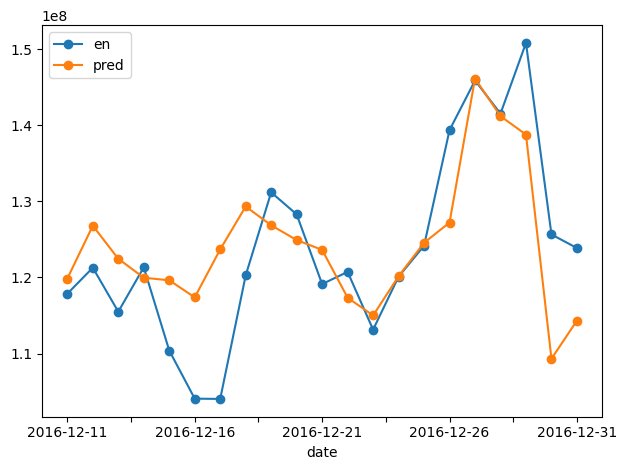

MAE : 6456457.662
RMSE : 8535513.919
MAPE: 0.054


In [504]:
#Creating and training the model
model = SARIMAX(train_x, order=(1,1,7), seasonal_order=(1,1,1,21), exog=dfexog['Exog'][:-21])
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=len(test_x), exog=dfexog['Exog'][-21:])
plt.figure(figsize=(20,15))
test_x.plot(style='-o')
plt.tight_layout()
plt.show()
performance(test_x['en'], test_x['pred'])

## Building the Prophet model for English Language

In [418]:
df_prophet = pd.DataFrame({'ds':pd.to_datetime(df_lang.index), 'y': df_lang['en'], 'exog':dfexog['Exog']})

In [419]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
 2   exog    550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 33.4+ KB


21:47:14 - cmdstanpy - INFO - Chain [1] start processing
21:47:14 - cmdstanpy - INFO - Chain [1] done processing


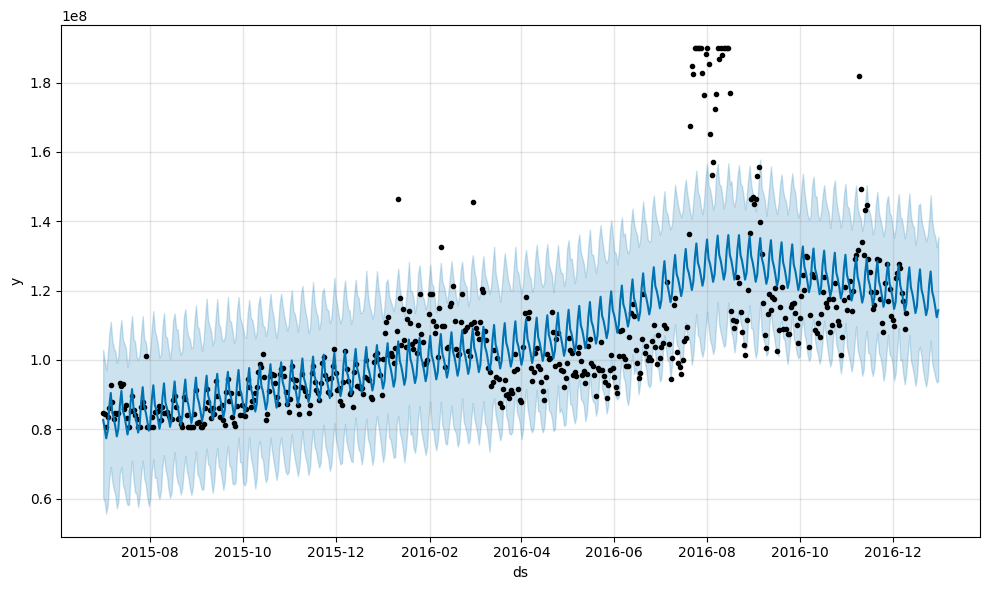

In [441]:
m = Prophet()
m.fit(df_prophet[['ds', 'y']][:-21]) #here we are leaving last 39 observations because we will predict it in 'future'
future = m.make_future_dataframe(periods=21,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

### Insights
- In the plot, black dots are actual visits, deep blue lines are the predicted visits and light blue lines is the 95% confidence interval around the prediction.

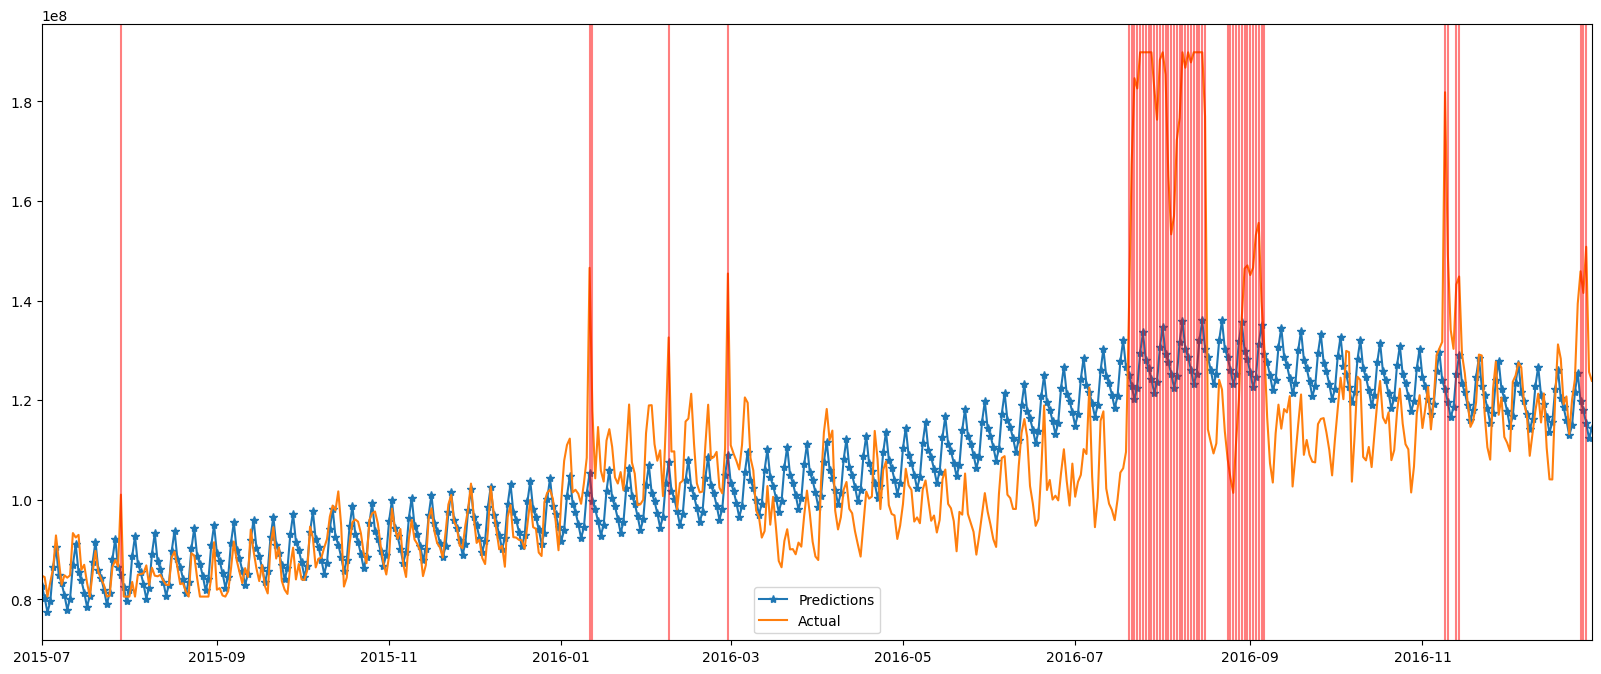

In [448]:
plt.figure(figsize=(20,8))
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df_prophet['ds'], df_prophet['y'], label = 'Actual')
for x in df_prophet.query('exog==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2016-12-31'))
plt.legend()

In [449]:
performance(df_prophet['y'][:-21],forecast['yhat'][:-21])

MAE : 10422437.786
RMSE : 16160042.05
MAPE: 0.088


### Insights:
- The MAPE of the model is 0.088 which is similar to the Sarimax model without the exog, which is performning well.

21:59:19 - cmdstanpy - INFO - Chain [1] start processing
21:59:20 - cmdstanpy - INFO - Chain [1] done processing


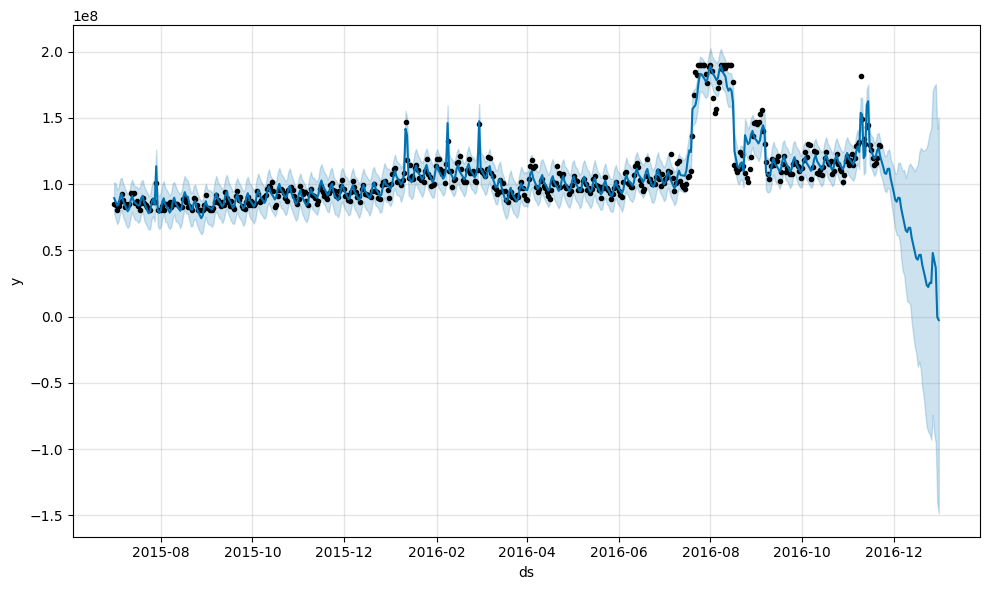

In [455]:
#Adding exog to the model
model2=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True,
               changepoint_prior_scale=4)
model2.add_regressor('exog') #adding holidays data in the model3
model2.fit(df_prophet[:-39])
forecast2 = model2.predict(df_prophet)
fig = model2.plot(forecast2)

In [456]:
performance(df_prophet['y'][:-21],forecast2['yhat'][:-21])

MAE : 4948655.451
RMSE : 8406861.591
MAPE: 0.044


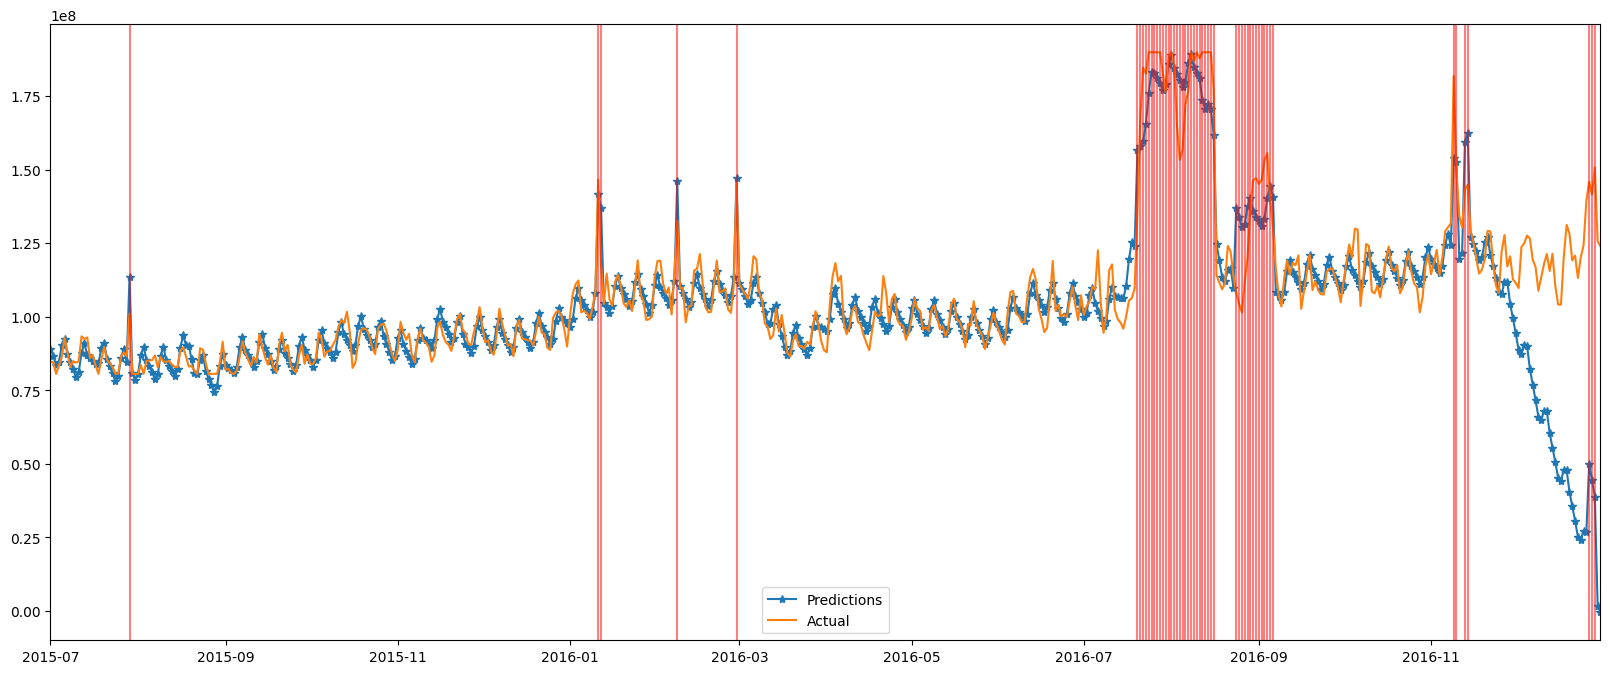

In [452]:
plt.figure(figsize=(20,8))
plt.plot(forecast2['ds'], forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(df_prophet['ds'], df_prophet['y'], label = 'Actual')
for x in df_prophet.query('exog==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2016-12-31'))
plt.legend()

## Creating a pipeline for implementing models on all languages

In [537]:
#Defining model training functions
def train_arima(df, p,d,q):
    model = ARIMA(df,order=(p,d,q))
    return model.fit()

def train_sarimax(train,test, lang, p,d,q,P,D,Q,s, exog):
    model = SARIMAX(train, exog=exog[:-21], order=(p,d,q), seasonal_order=(P,D,Q,s))
    model = model.fit(disp=False)
    test['pred'] = model.forecast(steps=len(test), exog=exog[-21:])
    return test

def train_sarima(train,test, lang, p,d,q,P,D,Q,s):
    model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,s))
    model = model.fit(disp=False)
    test['pred'] = model.forecast(steps=len(test))
    return test

In [534]:
test = train_sarimax(en_train_x, en_test_x, 'en', 1,1,7,1,1,1,21, dfexog['Exog'])

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [532]:
performance(test['en'], test['pred'])

MAE : 6456457.662
RMSE : 8535513.919
MAPE: 0.054


<Axes: xlabel='date'>

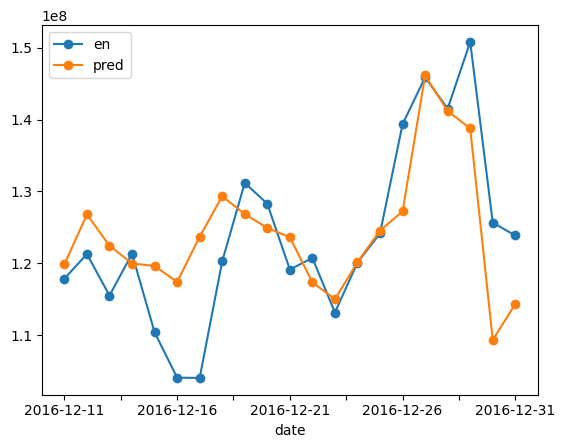

In [533]:
test.plot(style='-o')

### Building the model for German language

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for de')

<Figure size 2000x800 with 0 Axes>

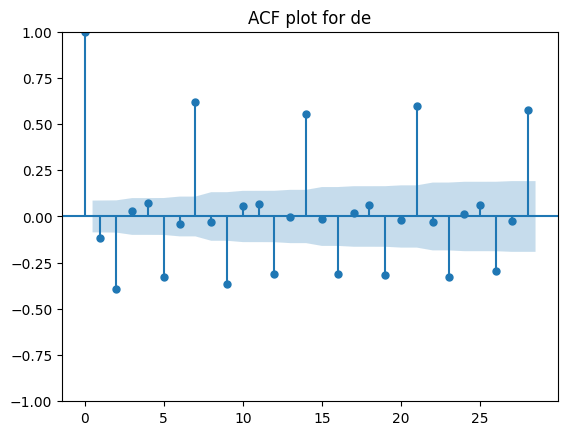

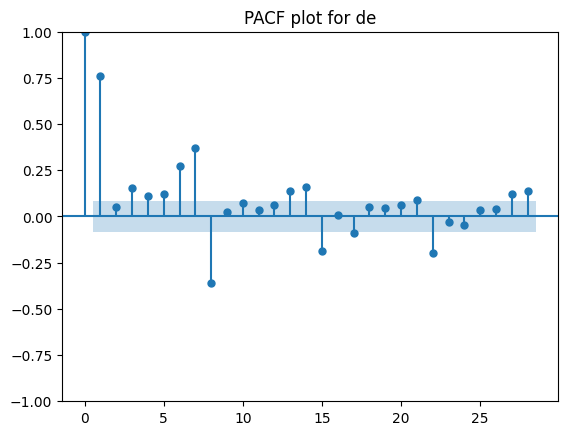

In [535]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['de'].dropna())
plt.title(f'ACF plot for de')
plot_pacf(df_lang['de'])
plt.title(f'PACF plot for de')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 1516603.153
RMSE : 2077747.971
MAPE: 0.081


<Axes: xlabel='date'>

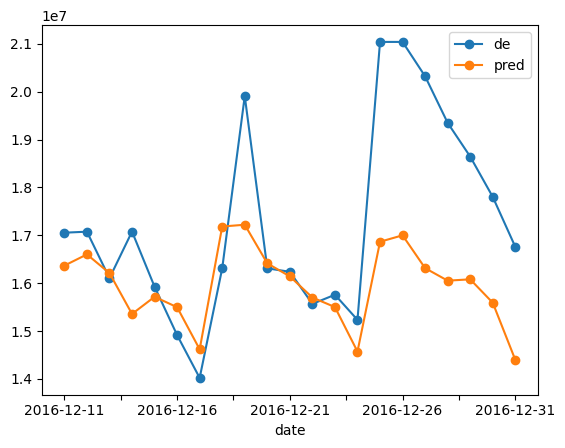

In [543]:
test = train_sarima(de_train_x, de_test_x, 'de', 1,1,7,1,1,1,21)
performance(test['de'], test['pred'])
test.plot(style='-o')

### Building the model for Spanish language

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for es')

<Figure size 2000x800 with 0 Axes>

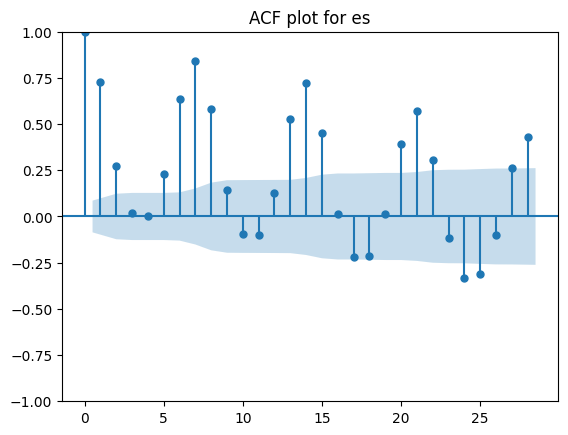

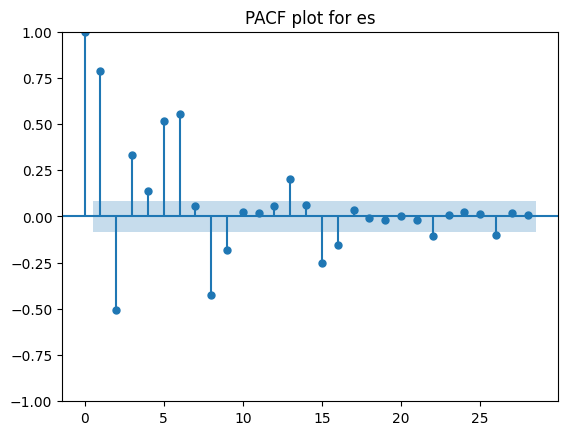

In [552]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['es'].dropna())
plt.title(f'ACF plot for es')
plot_pacf(df_lang['es'])
plt.title(f'PACF plot for es')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 1101211.472
RMSE : 1318984.297
MAPE: 0.077


<Axes: xlabel='date'>

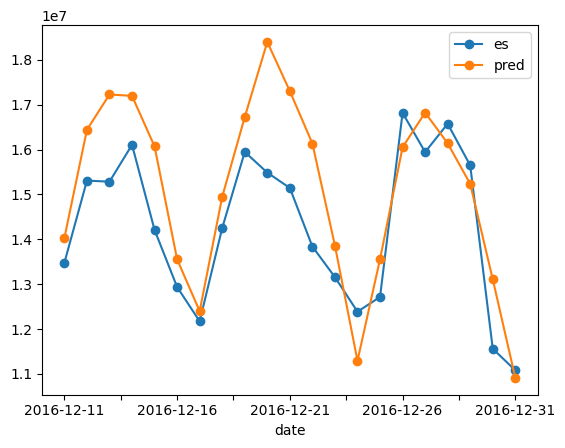

In [546]:
test = train_sarima(es_train_x, es_test_x, 'es', 1,1,7,1,1,1,21)
performance(test['es'], test['pred'])
test.plot(style='-o')

### Building the model for French language

Text(0.5, 1.0, 'PACF plot for fr')

<Figure size 2000x800 with 0 Axes>

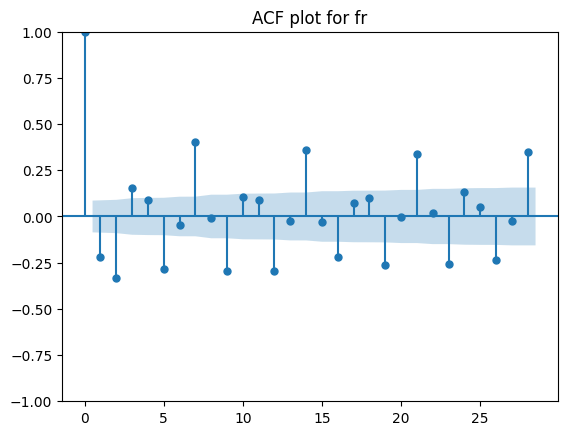

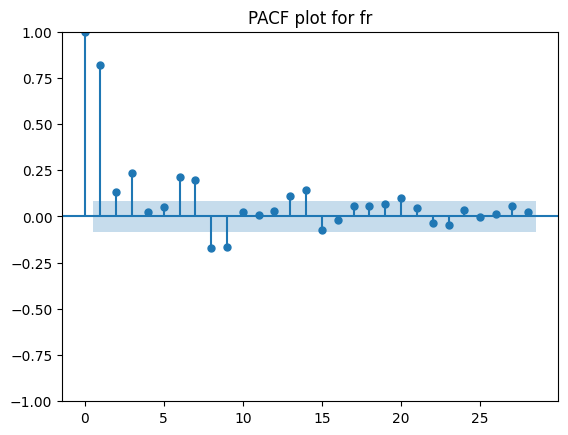

In [553]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['fr'].dropna())
plt.title(f'ACF plot for fr')
plot_pacf(df_lang['fr'])
plt.title(f'PACF plot for fr')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 1076224.581
RMSE : 1374524.971
MAPE: 0.081


<Axes: xlabel='date'>

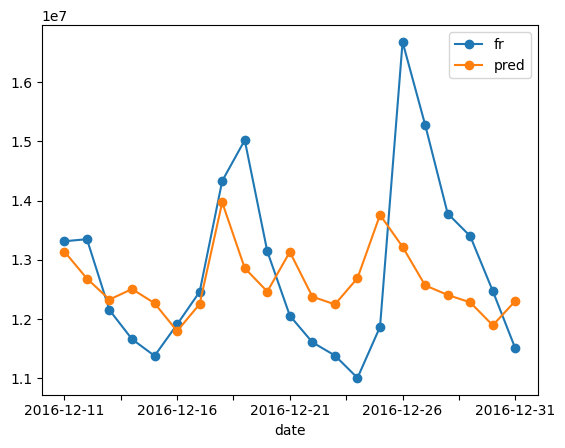

In [547]:
test = train_sarima(fr_train_x, fr_test_x, 'fr', 1,1,7,1,1,1,21)
performance(test['fr'], test['pred'])
test.plot(style='-o')

### Building the model for Japanese language

Text(0.5, 1.0, 'PACF plot for ja')

<Figure size 2000x800 with 0 Axes>

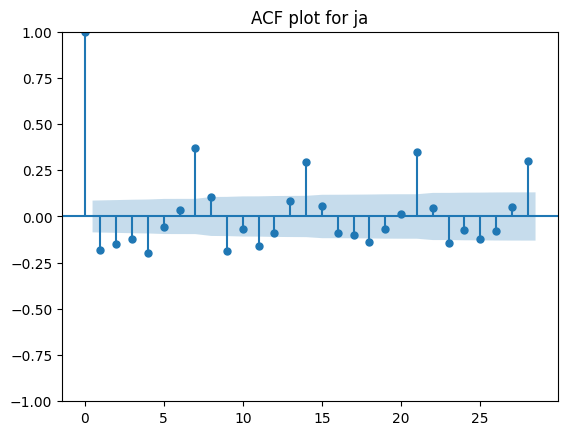

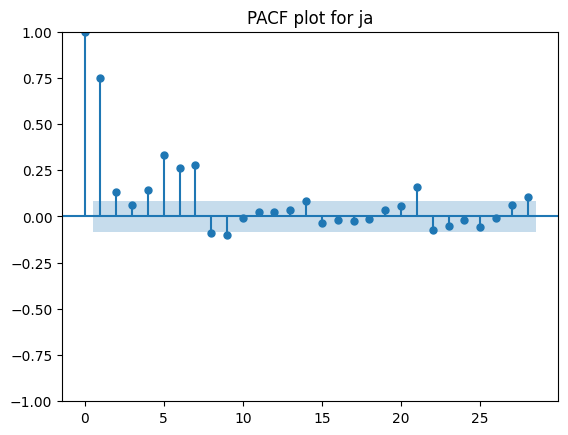

In [554]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['ja'].dropna())
plt.title(f'ACF plot for ja')
plot_pacf(df_lang['ja'])
plt.title(f'PACF plot for ja')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 1295097.842
RMSE : 1701171.797
MAPE: 0.076


<Axes: xlabel='date'>

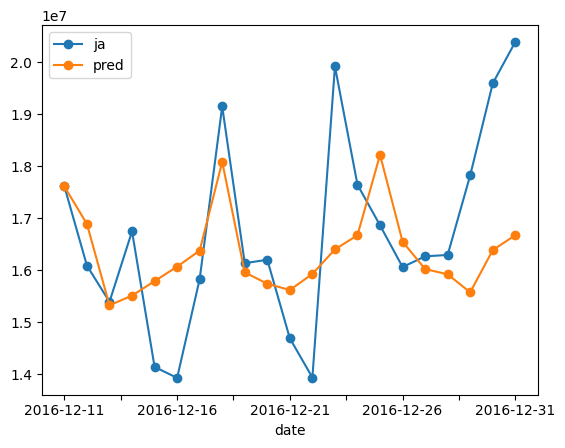

In [548]:
test = train_sarima(ja_train_x, ja_test_x, 'ja', 1,1,7,1,1,1,21)
performance(test['ja'], test['pred'])
test.plot(style='-o')

### Building the model for Russian language

Text(0.5, 1.0, 'PACF plot for ru')

<Figure size 2000x800 with 0 Axes>

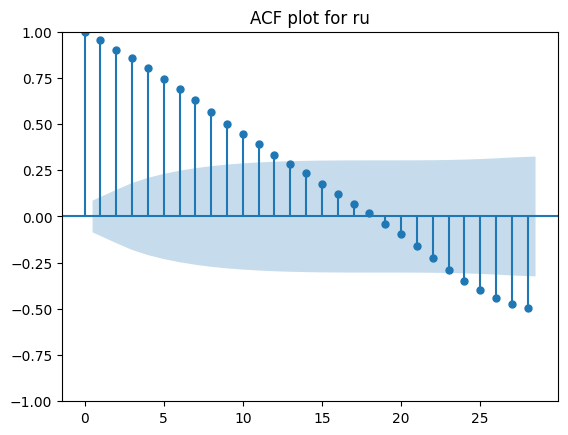

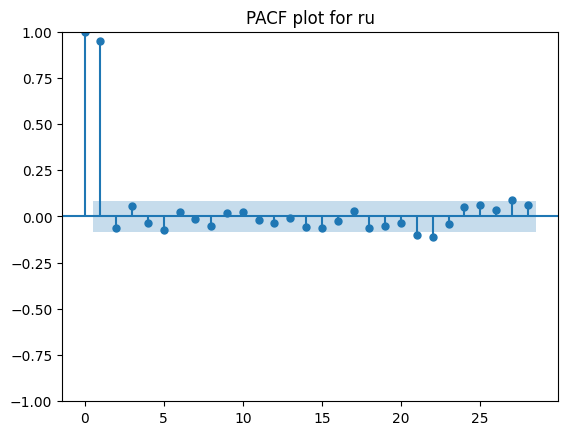

In [555]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['ru'].dropna())
plt.title(f'ACF plot for ru')
plot_pacf(df_lang['ru'])
plt.title(f'PACF plot for ru')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 1031012.819
RMSE : 1205723.008
MAPE: 0.073


<Axes: xlabel='date'>

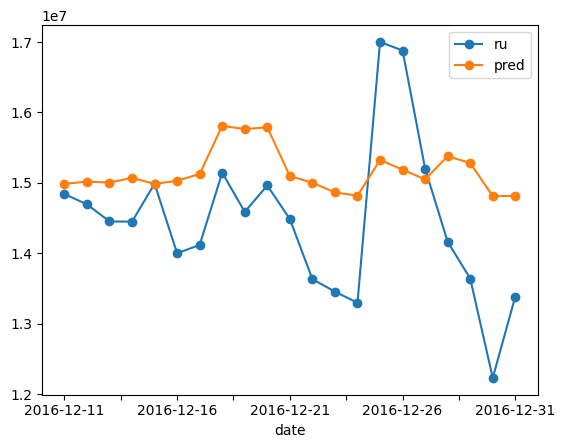

In [559]:
test = train_sarima(ru_train_x, ru_test_x, 'ru', 1,1,1,1,0,1,21)
performance(test['ru'], test['pred'])
test.plot(style='-o')

### Building the model for Chinese language

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for zh')

<Figure size 2000x800 with 0 Axes>

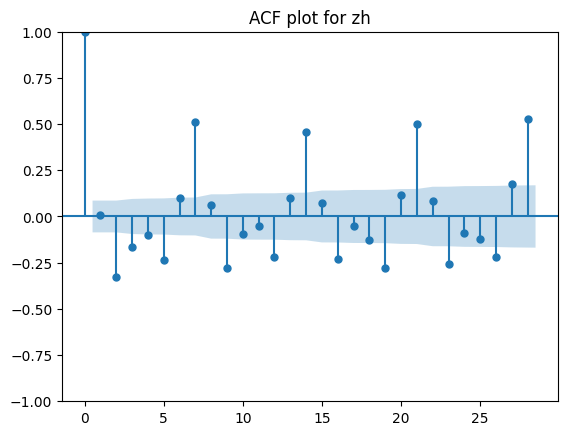

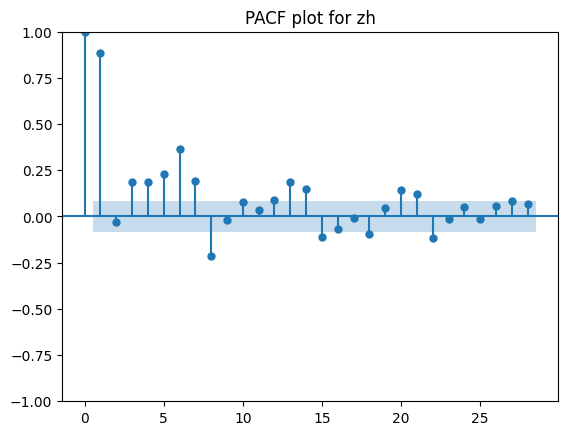

In [560]:
plt.figure(figsize=(20,8))
plot_acf(df_deseason['zh'].dropna())
plt.title(f'ACF plot for zh')
plot_pacf(df_lang['zh'])
plt.title(f'PACF plot for zh')

C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\shaje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 226317.541
RMSE : 285660.254
MAPE: 0.036


<Axes: xlabel='date'>

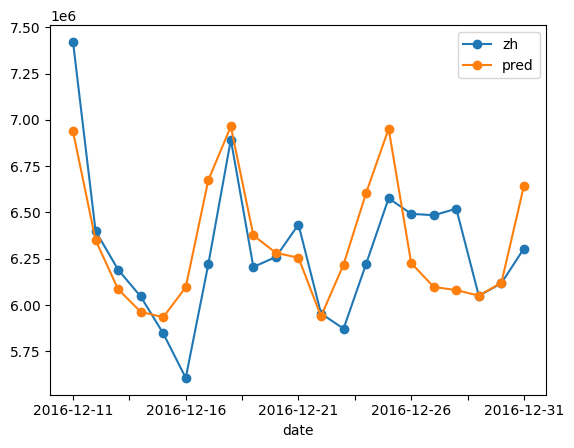

In [562]:
test = train_sarima(zh_train_x, zh_test_x, 'zh', 1,1,7,1,1,1,21)
performance(test['zh'], test['pred'])
test.plot(style='-o')

# Insights:

### Chinese Language Performance:

MAE: 226,317.541
RMSE: 285,660.254
MAPE: 0.036
- Insight: The SARIMAX model performs the best for Chinese language pages, with the lowest MAE, RMSE, and MAPE. This suggests high accuracy in forecasting views for Chinese pages.

### Russian Language Performance:

MAE: 1,031,012.819
RMSE: 1,205,723.008
MAPE: 0.073
- Insight: The model also performs relatively well for Russian language pages, showing reasonably low MAE and RMSE, and a moderate MAPE.

### Spanish Language Performance:

MAE: 1,101,211.472
RMSE: 1,318,984.297
MAPE: 0.077
- Insight: The Spanish language model has a slightly higher error rate compared to Russian and Chinese, indicating a bit less accuracy in forecasting.

### German Language Performance:

MAE: 1,516,603.153
RMSE: 2,077,747.971
MAPE: 0.081
- Insight: The German model shows higher MAE and RMSE values, indicating that the forecasts may be less accurate compared to other languages.

### English Language Performance:

MAE: 6,456,457.662
RMSE: 8,535,513.919
MAPE: 0.054
- Insight: The English language model has the highest MAE and RMSE, suggesting the least accuracy in forecasting page views.

# Recommendations:

### Prioritize Ad Placement for Chinese Pages:

- Given the superior performance of the SARIMAX model for Chinese pages, prioritize ad placement strategies for this language. Accurate forecasts can lead to more effective and targeted ad placements.

### Enhance Forecasting for Other Languages:

- For languages like English and German where model accuracy is lower, consider refining the SARIMAX models by exploring additional features or adjusting parameters. Integrate additional data sources or variables that might impact view counts.

### Regional Tailoring:

- Utilize the accurate forecasts from models for Chinese and Russian pages to tailor ad strategies for those regions. For regions with less accuracy, use a more cautious approach, and possibly allocate a lower ad budget until forecasting accuracy improves.

### Cross-Language Strategy:

- Combine insights from multiple languages to form a comprehensive ad placement strategy. For example, if certain ads perform well in languages with higher model accuracy, use this information to guide similar strategies in other languages.

### Model Improvement:

- Investigate the reasons behind the lower performance of models for languages like English. It may be useful to explore more complex models or alternative time series forecasting methods to enhance accuracy.

### Regular Model Evaluation:

- Continuously monitor and evaluate the performance of the SARIMAX models as new data becomes available. Implement regular updates and adjustments to maintain high forecasting accuracy over time.


By leveraging these insights and recommendations, you can optimize ad placements to maximize client satisfaction and ad performance across different language regions.